In [1]:
import sys
import mne
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
edf_file = "./data/YJ8491RR.edf"
# 读取 EEG 数据
raw = mne.io.read_raw_edf(edf_file, preload=True)

# 读取 Order 文件
order_file = "./data/short/ADR_order3_session1.csv"  # 替换为你的 Order 文件路径
order_data = pd.read_csv(order_file)
print(order_data.head())  # 查看 Order 文件内容

Extracting EDF parameters from C:\Users\hyang\Documents\GitRepository\EEG_Language\analysis\data\YJ8491RR.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 463103  =      0.000 ...   463.103 secs...
   trial_index                         audio_filename          condition  \
0            1   ADR_short_grammatical/A1B1A2B2_1.wav  short_grammatical   
1            2  ADR_short_grammatical/A2B2A3B3_67.wav  short_grammatical   
2            3  ADR_short_grammatical/A2B2A3B3_70.wav  short_grammatical   
3            4  ADR_short_grammatical/A2B2A1B1_28.wav  short_grammatical   
4            5  ADR_short_grammatical/A1B1A2B2_13.wav  short_grammatical   

   position  
0         0  
1         0  
2         0  
3         0  
4         0  


In [5]:
# 查看基本信息
print(raw.info)

# 获取所有通道名称
channel_names = raw.ch_names
# 绘制原始信号
# raw.plot(duration=10, n_channels=30)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG A1-Ref, EEG A2-Ref, POL A3, POL A4, POL A5, POL A6, POL A7, ...
 chs: 141 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2025-02-06 10:36:51 UTC
 nchan: 141
 projs: []
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: 0, sex: 0, last_name: X>
>


In [7]:
# 使用正则表达式匹配 "A" 后跟数字的通道
pattern = r"\bA\d+\b"  # 匹配 "A" + 数字，确保 "A10" 但不匹配 "B1"
eeg_channels = [ch for ch in channel_names if re.search(pattern, ch) and "$" not in ch]

# 打印符合条件的通道
print("保留的 EEG 通道:", eeg_channels)

保留的 EEG 通道: ['EEG A1-Ref', 'EEG A2-Ref', 'POL A3', 'POL A4', 'POL A5', 'POL A6', 'POL A7', 'POL A8', 'POL A9', 'POL A10', 'POL A13', 'POL A14', 'POL A15', 'POL A16', 'POL A17', 'POL A18', 'POL A19', 'POL A20', 'POL A21', 'POL A22', 'POL A23', 'POL A11', 'POL A12', 'POL A24', 'POL A25', 'POL A26', 'POL A27', 'POL A28', 'POL A29', 'POL A30', 'POL A31', 'POL A32', 'POL A33', 'POL A34', 'POL A35', 'POL A36', 'POL A37', 'POL A38', 'POL A39', 'POL A40', 'POL A41', 'POL A42', 'POL A43', 'POL A44', 'POL A45', 'POL A46', 'POL A47', 'POL A48', 'POL A49', 'POL A50', 'POL A51', 'POL A52', 'POL A53', 'POL A54', 'POL A55', 'POL A56', 'POL A57', 'POL A58', 'POL A59', 'POL A60', 'POL A61', 'POL A62', 'POL A63', 'POL A64']


In [9]:
trigger_channel = 'POL DC01'  # DC 触发通道
# 提取选定的通道
raw = raw.copy().pick_channels(eeg_channels+ [trigger_channel])

# 将该通道的类型修改为 'stim'
raw.set_channel_types({trigger_channel: 'stim'})

# 再次检查类型是否修改成功
print(f"修改后 {trigger_channel} 类型为:", raw.get_channel_types())
# 绘制选择的通道信号
# raw_selected.plot(duration=5, scalings='auto')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
修改后 POL DC01 类型为: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'stim']


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


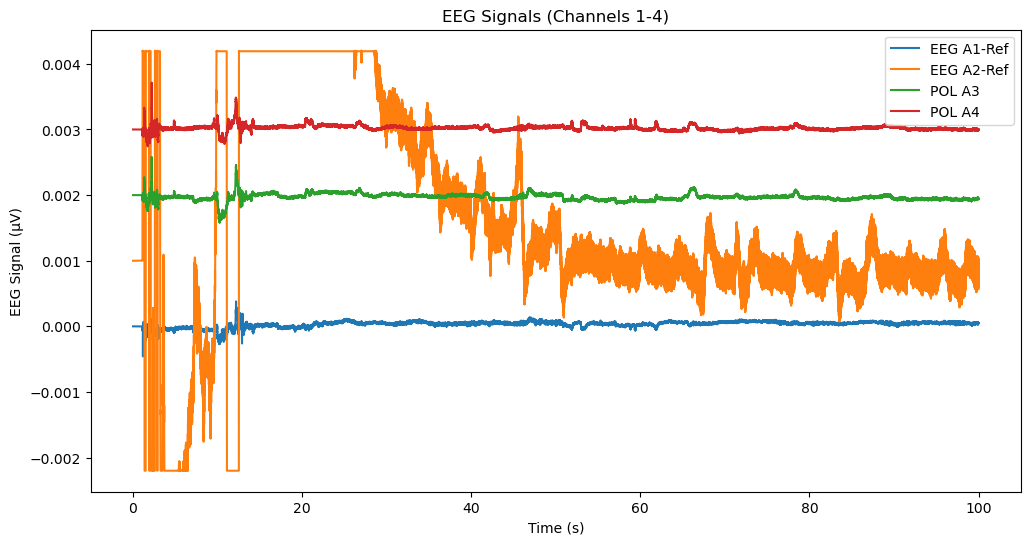

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


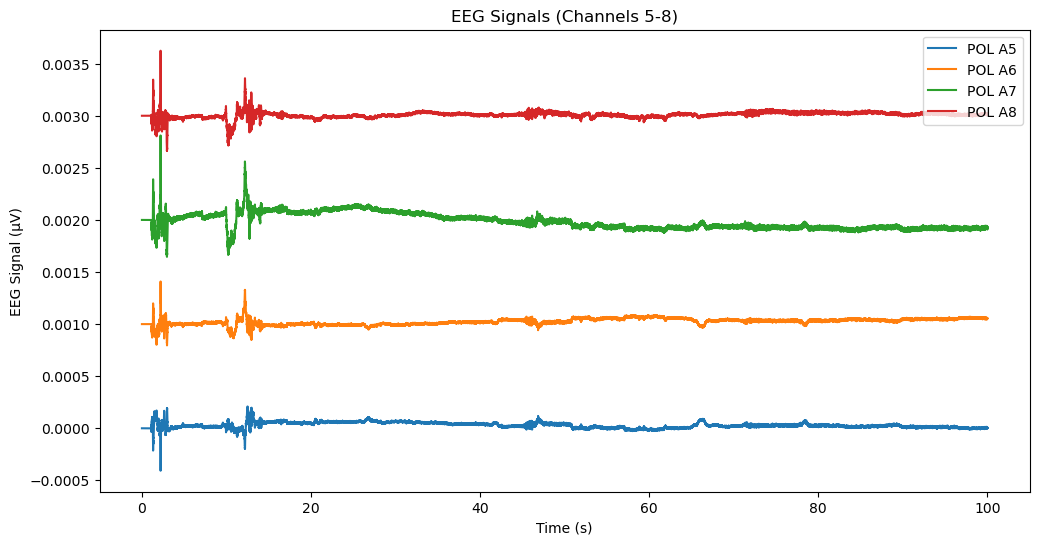

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


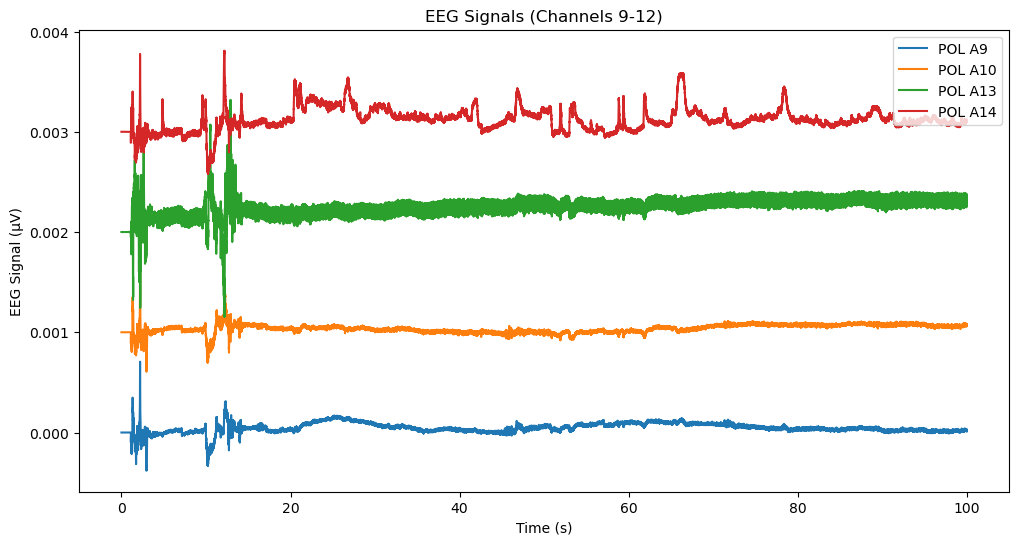

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


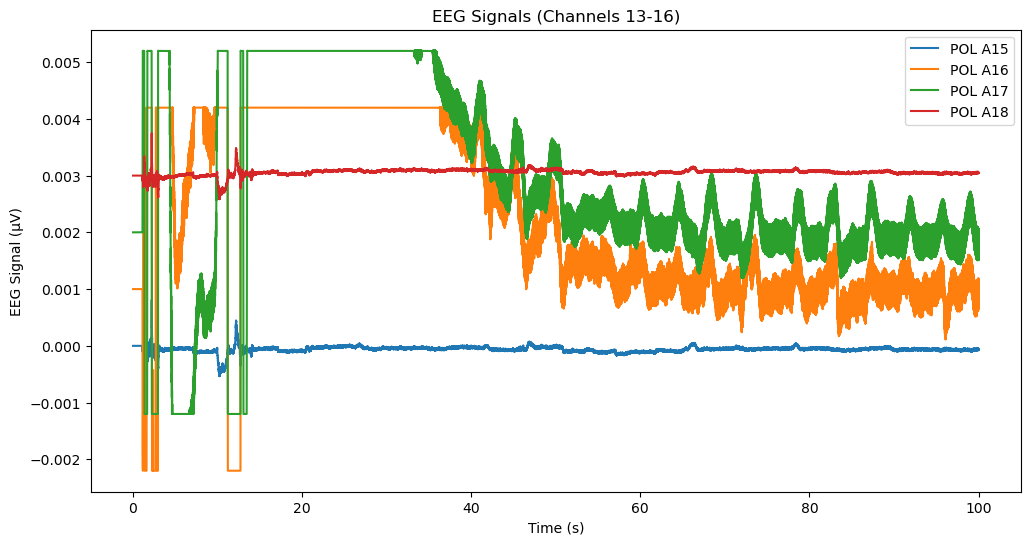

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


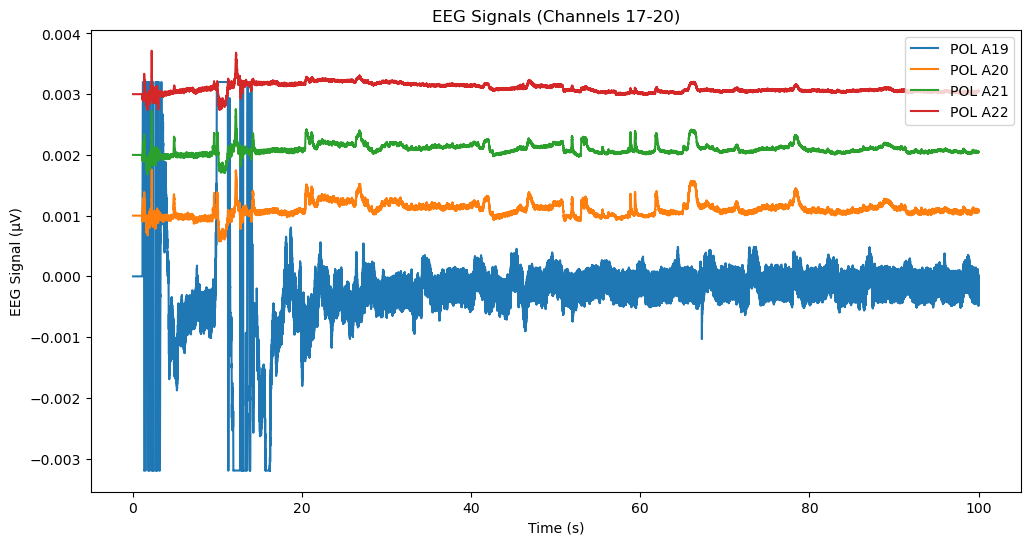

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


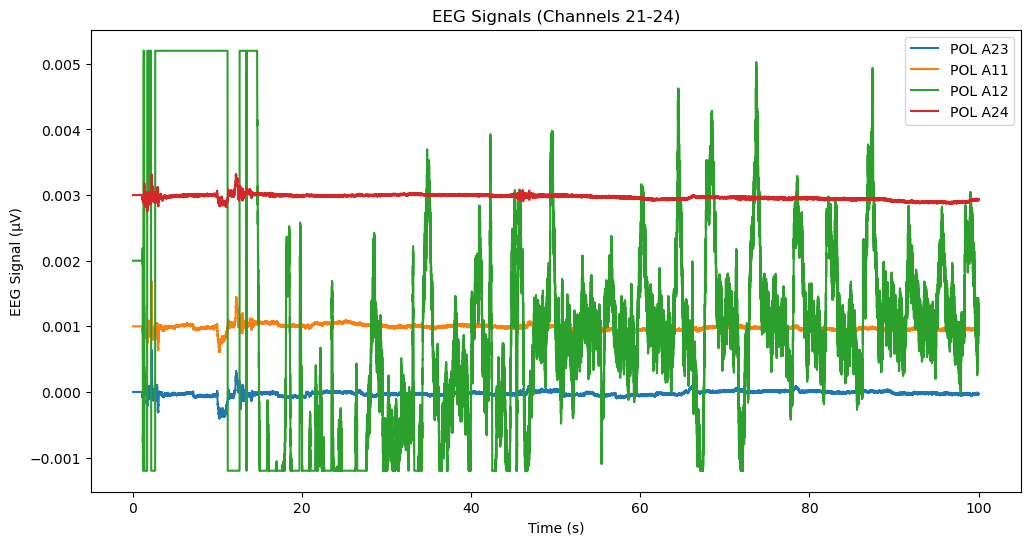

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


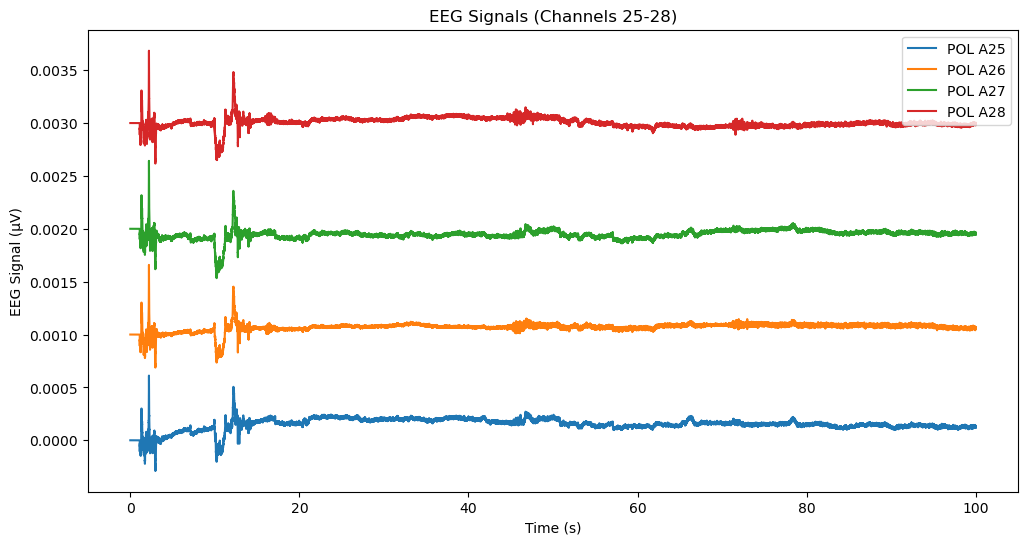

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


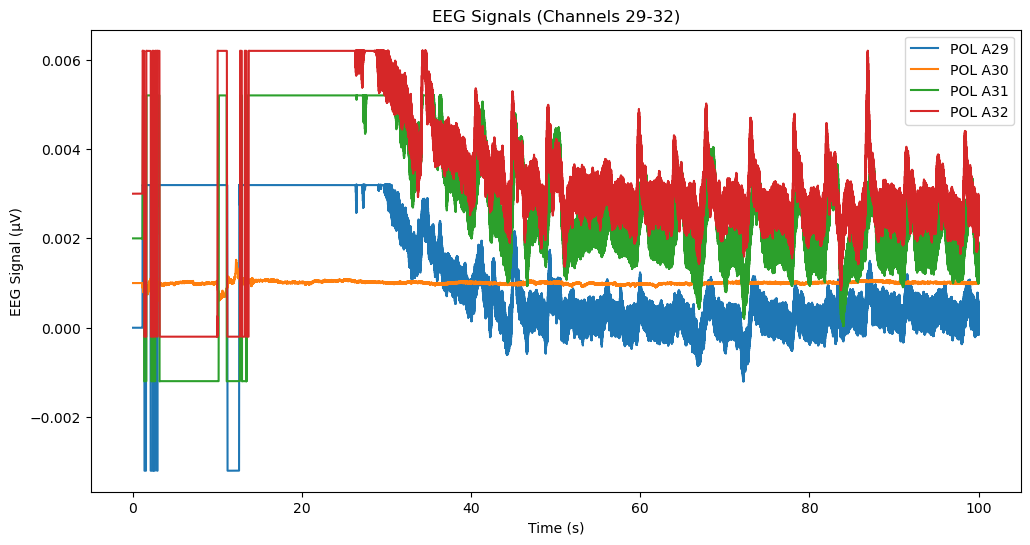

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


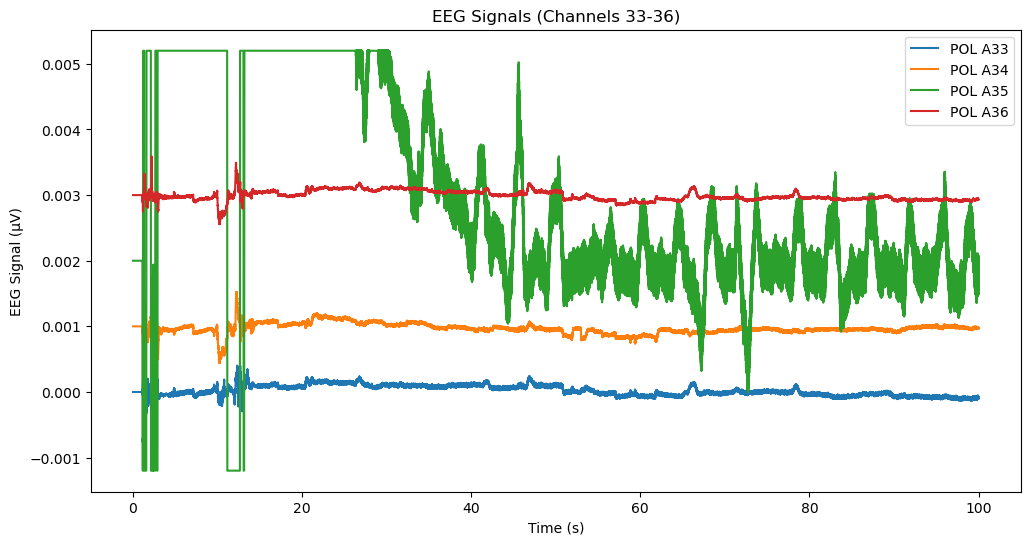

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


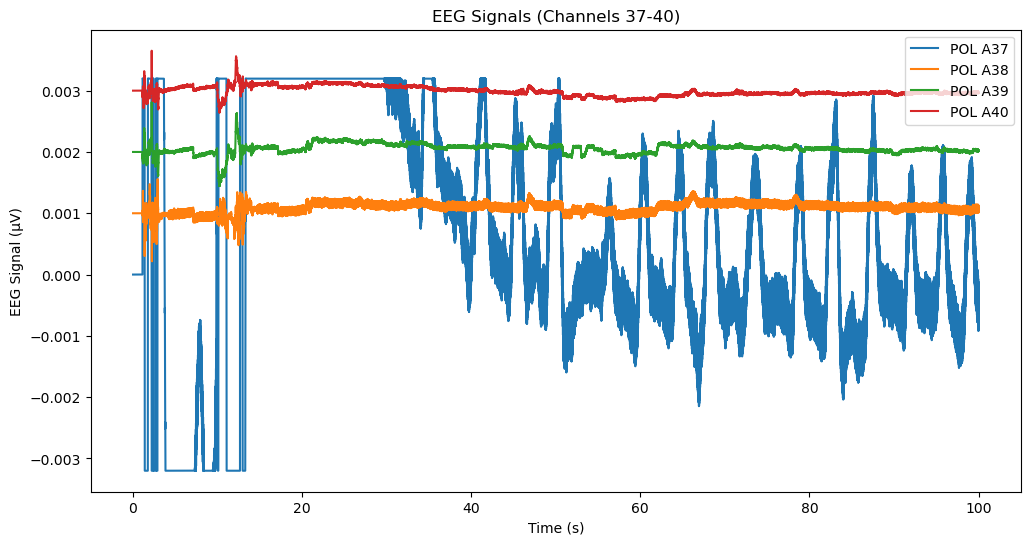

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


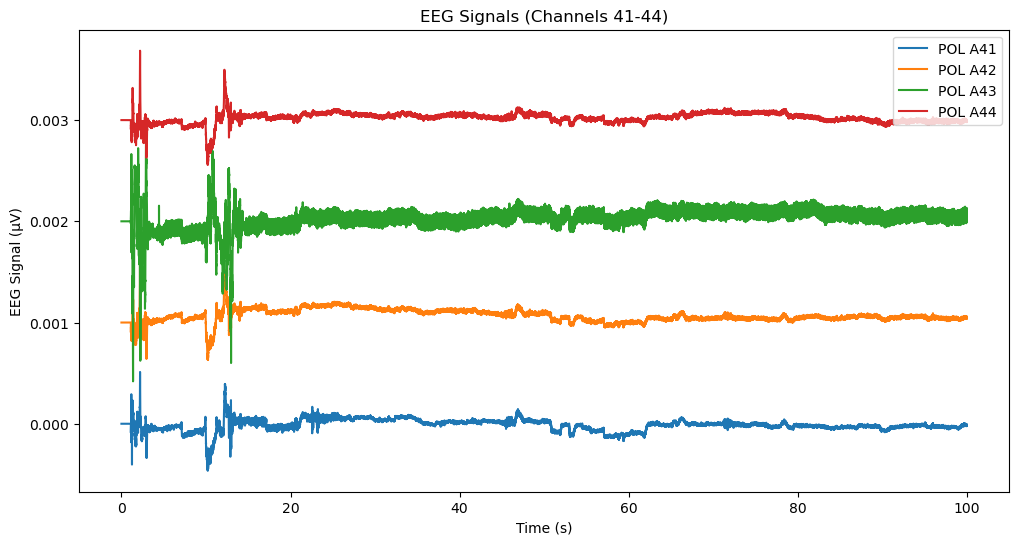

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


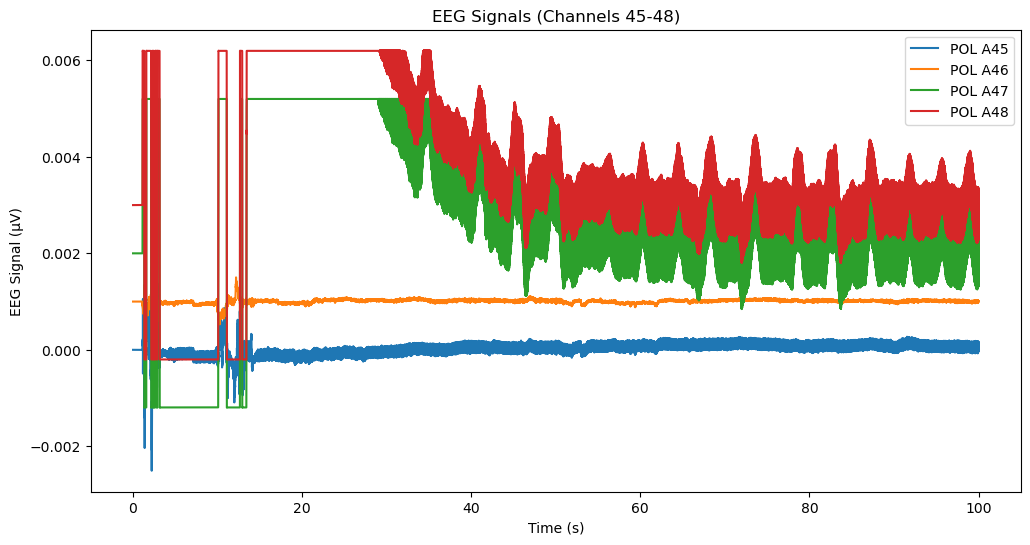

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


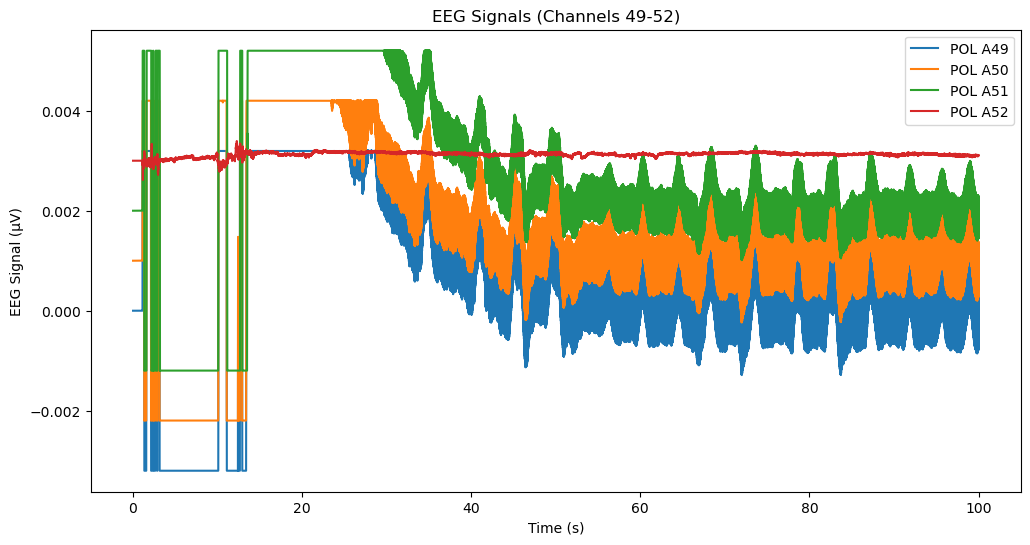

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


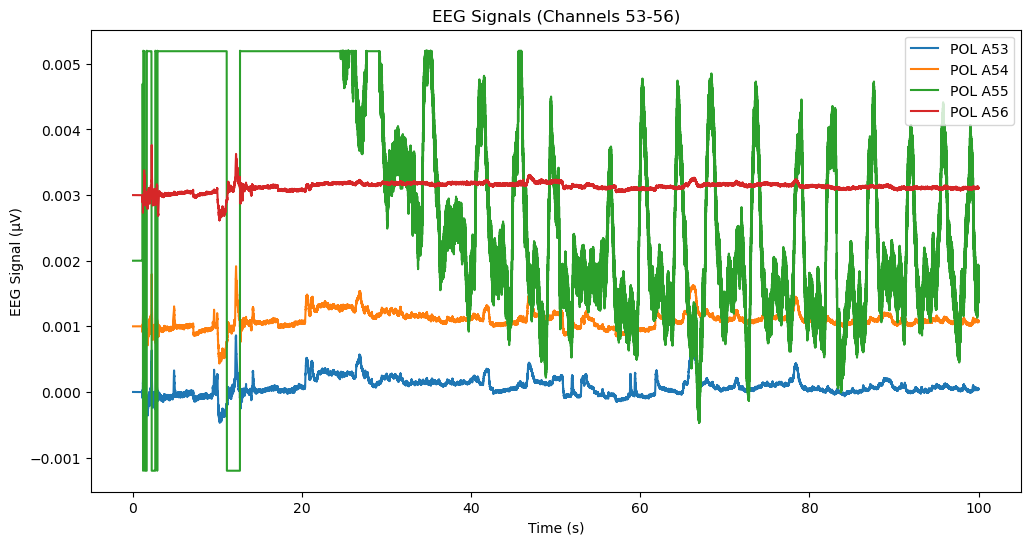

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


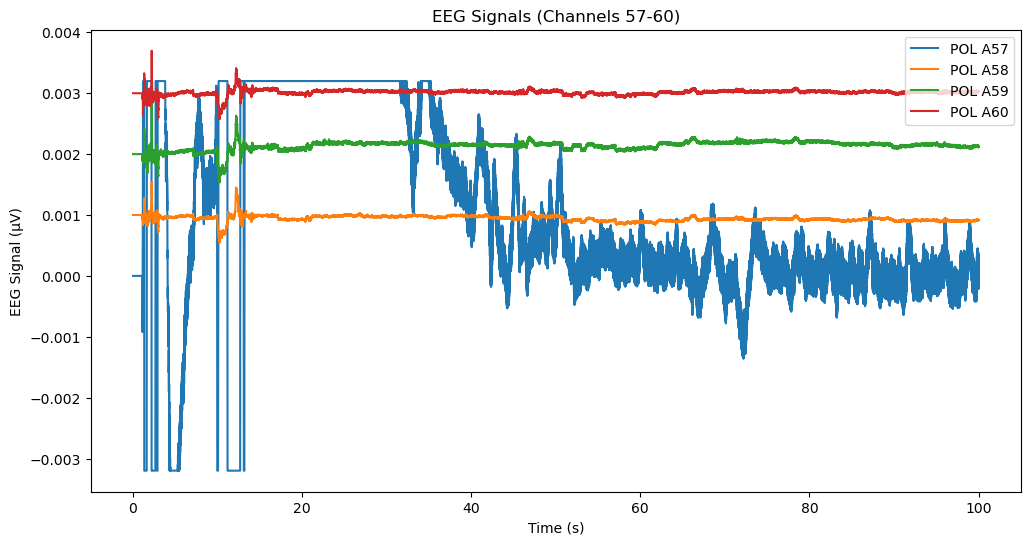

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


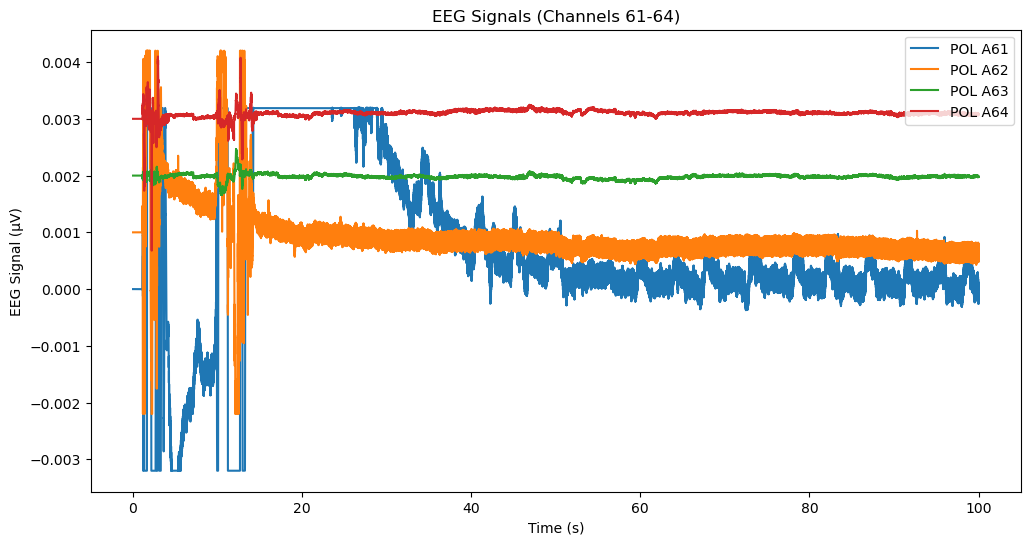

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


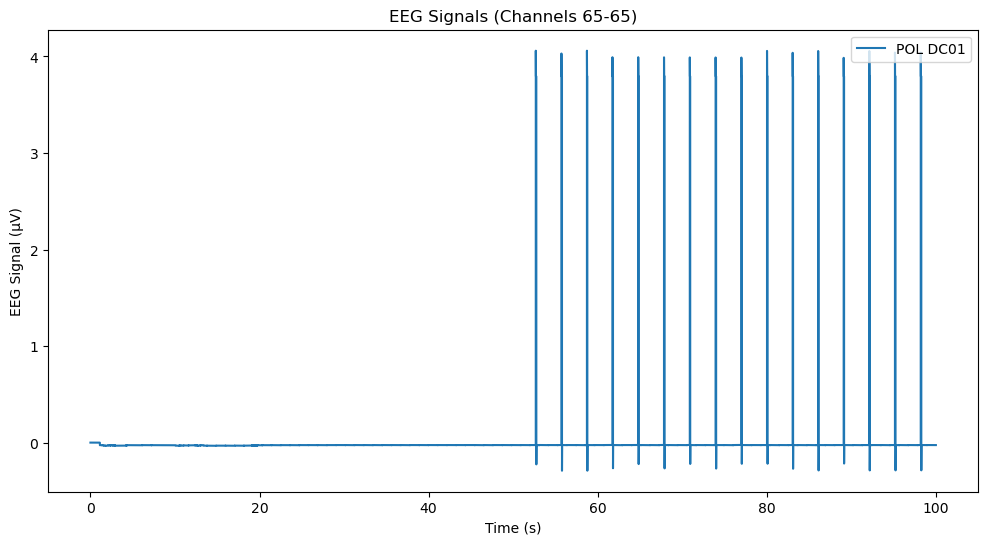

In [11]:
# 获取所有通道名称
channel_names = raw.ch_names
n_channels = len(channel_names)

# 设置绘图参数
window_size = 100  # 每张图显示 100s
fs = int(raw.info['sfreq'])  # 采样率
samples_per_window = window_size * fs  # 100s 对应的样本数
channels_per_plot = 4  # 每张图绘制 6 个通道

# 遍历通道，5 个通道一组
for i in range(0, n_channels, channels_per_plot):
    plt.figure(figsize=(12, 6))

    # 获取当前要绘制的通道
    selected_channels = channel_names[i:i + channels_per_plot]

    # 获取数据
    raw_subset = raw.copy().pick_channels(selected_channels)
    data, times = raw_subset[:, :samples_per_window]  # 取前 100s 的数据

    # 绘制 6 个通道
    for j, ch_name in enumerate(selected_channels):
        plt.plot(times, data[j] + j * 0.001, label=ch_name)  # 叠加通道，避免重叠
    
    plt.xlabel("Time (s)")
    plt.ylabel("EEG Signal (µV)")
    plt.title(f"EEG Signals (Channels {i+1}-{i+len(selected_channels)})")
    plt.legend(loc="upper right")
    plt.show()

In [12]:
# 手动标记坏通道
bad_channels = ['EEG A2-Ref', 'POL A12', 'POL A13', 'POL A16', 'POL A17', 'POL A19', 'POL A20', 'POL A29', 'POL A31', 'POL A32', 'POL A35', 'POL A37', 'POL A38', 'POL A43', 'POL A45', 'POL A47', 'POL A48', 'POL A49', 'POL A50', 'POL A51', 'POL A55', 'POL A57', 'POL A61', 'POL A62']

# 从数据中 **完全删除坏通道**
raw.drop_channels(bad_channels)

# 确认删除后的通道列表
print("删除后的通道:", raw.ch_names)


删除后的通道: ['EEG A1-Ref', 'POL A3', 'POL A4', 'POL A5', 'POL A6', 'POL A7', 'POL A8', 'POL A9', 'POL A10', 'POL A14', 'POL A15', 'POL A18', 'POL A21', 'POL A22', 'POL A23', 'POL A11', 'POL A24', 'POL A25', 'POL A26', 'POL A27', 'POL A28', 'POL A30', 'POL A33', 'POL A34', 'POL A36', 'POL A39', 'POL A40', 'POL A41', 'POL A42', 'POL A44', 'POL A46', 'POL A52', 'POL A53', 'POL A54', 'POL A56', 'POL A58', 'POL A59', 'POL A60', 'POL A63', 'POL A64', 'POL DC01']


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


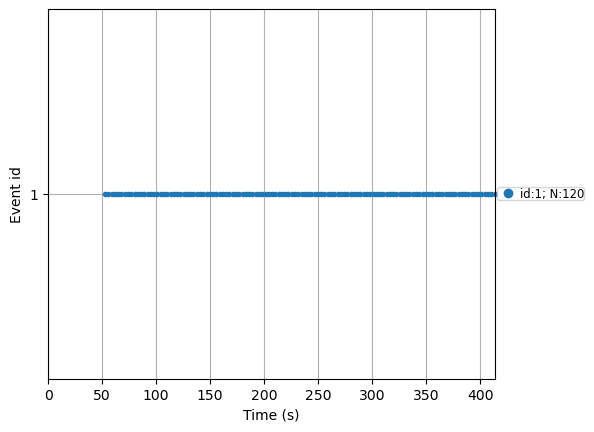

检测到 120 个事件


In [15]:
# 获取 DC Trigger 信号
dc_data, times = raw.copy().pick_channels([trigger_channel]).get_data(return_times=True)

# 设置触发阈值
threshold = np.mean(dc_data) + 2 * np.std(dc_data)

# 识别上升沿 (Trigger ON) 的索引
trigger_mask = dc_data[0] > threshold
trigger_on_indices = np.where(np.diff(trigger_mask.astype(int)) == 1)[0]

# 转换为秒
trigger_on_times = trigger_on_indices / raw.info['sfreq']
# 最后一个trigger标志着实验结束
filtered_trigger_times = trigger_on_times[:-1]

# 转换为 MNE Events 格式
event_id = 1  # 事件编号
events = np.array([[int(t * raw.info['sfreq']), 0, event_id] for t in filtered_trigger_times])

# 可视化事件
mne.viz.plot_events(events, sfreq=raw.info['sfreq'])

print(f"检测到 {len(events)} 个事件")

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 3501 original time points ...


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


0 bad epochs dropped
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


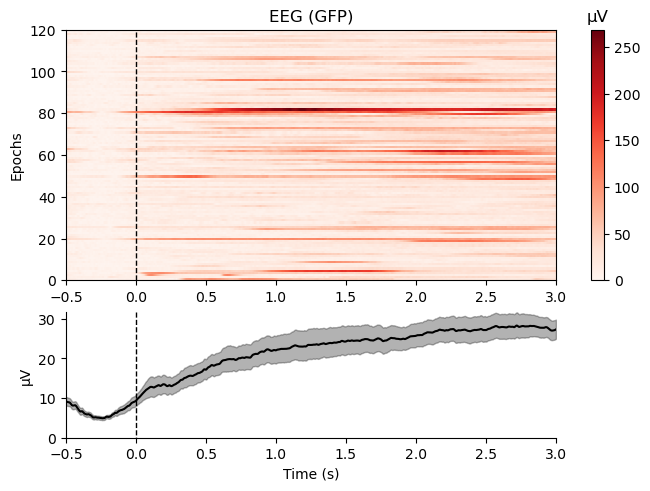

[<Figure size 640x480 with 3 Axes>]

In [17]:
raw.filter(0.1, 40, fir_design='firwin')

# 设定时间窗口 (-200ms 到 +4000ms)
tmin, tmax = -0.5, 3.0

# 创建 Epochs
epochs = mne.Epochs(raw, events, event_id={f'Trigger': event_id},
                     tmin=tmin, tmax=tmax, baseline=(None, 0), preload=True)

# 绘制 epochs
epochs.plot_image(picks="eeg")

Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 3501 original time points ...
    Rejecting  epoch based on EEG : ['POL A14', 'POL A21', 'POL A34', 'POL A39', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A4', 'POL A14', 'POL A21', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A21', 'POL A34', 'POL A39', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A3', 'POL A14', 'POL A21', 'POL A22', 'POL A33', 'POL A36', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A21', 'POL A33', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 

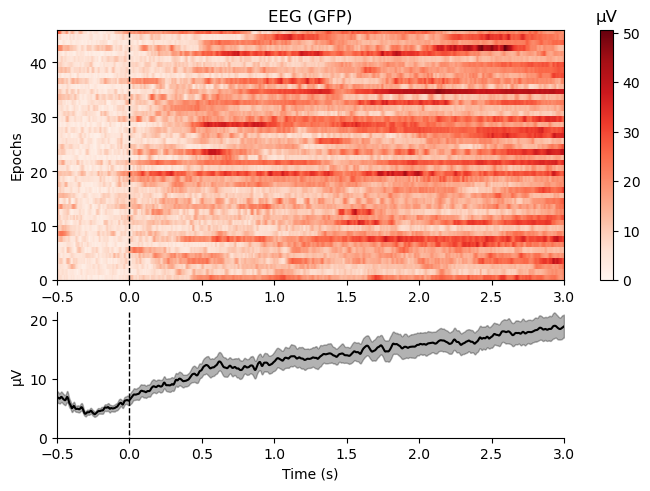

[<Figure size 640x480 with 3 Axes>]

In [25]:
# 自动剔除振幅异常的 Epochs
reject_criteria = dict(eeg=150e-6)  # 150 µV (单位是 V)
epochs_clean = mne.Epochs(raw, events, event_id, tmin=-0.5, tmax=3.0,
                          baseline=(None, 0), reject=reject_criteria, preload=True)

print(f"原始 Epochs 数量: {len(epochs)}")
print(f"清理后 Epochs 数量: {len(epochs_clean)}")

# 绘制清理后的 Epochs
epochs_clean.plot_image()


Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 3501 original time points ...
    Rejecting  epoch based on EEG : ['POL A14', 'POL A21', 'POL A34', 'POL A39', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A4', 'POL A14', 'POL A21', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A21', 'POL A34', 'POL A39', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A3', 'POL A14', 'POL A21', 'POL A22', 'POL A33', 'POL A36', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 'POL A21', 'POL A33', 'POL A53', 'POL A54']
    Rejecting  epoch based on EEG : ['POL A14', 

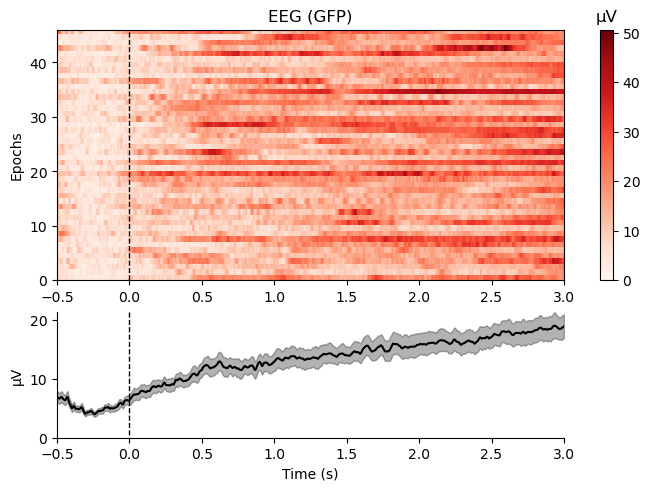

[<Figure size 640x480 with 3 Axes>]

In [27]:
# 检测信号渐变过大的 Epochs
reject_criteria = dict(eeg=150e-6)  # 振幅阈值
flat_criteria = dict(eeg=1e-6)      # 检测信号过于平坦 (可能是坏通道)
epochs_clean = mne.Epochs(raw, events, event_id, tmin=-0.5, tmax=3.0,
                          baseline=(None, 0), reject=reject_criteria,
                          flat=flat_criteria, preload=True)

print(f"清理后的 Epochs 数量: {len(epochs_clean)}")
epochs_clean.plot_image()


NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


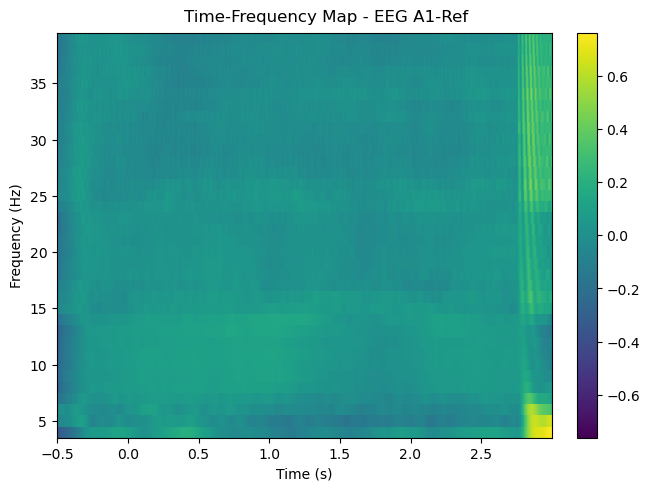

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


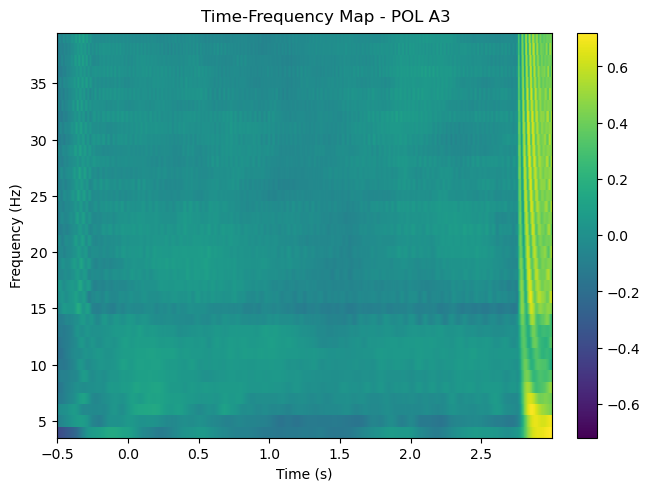

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


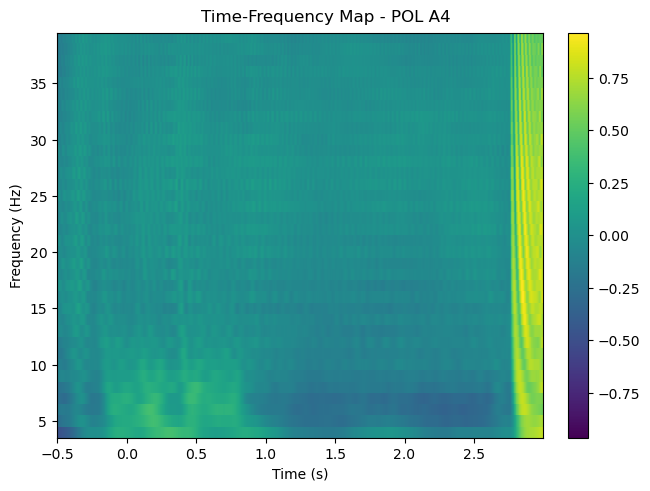

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


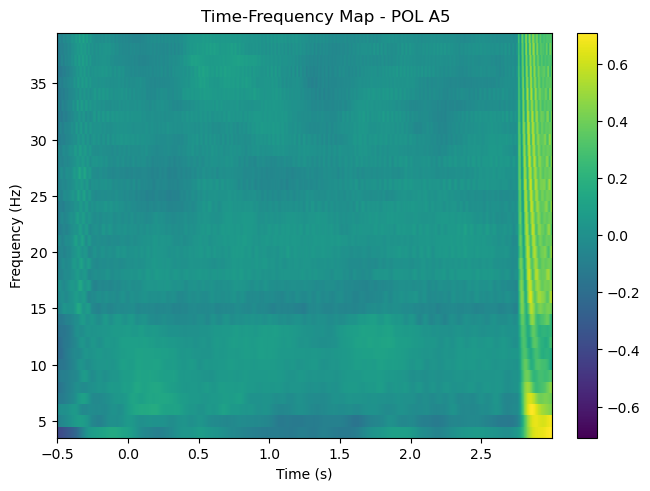

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


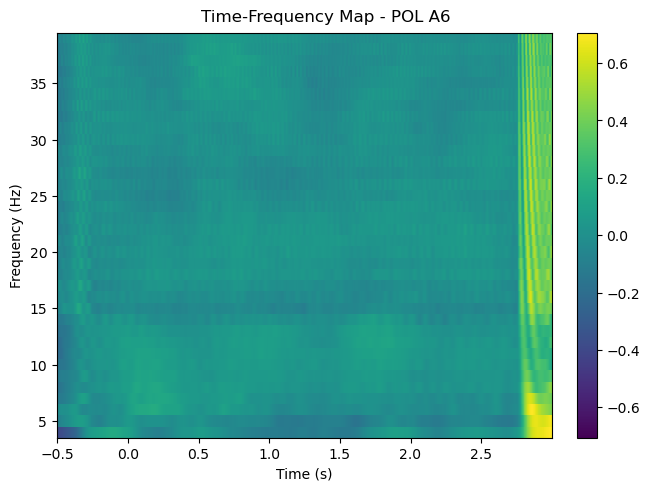

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


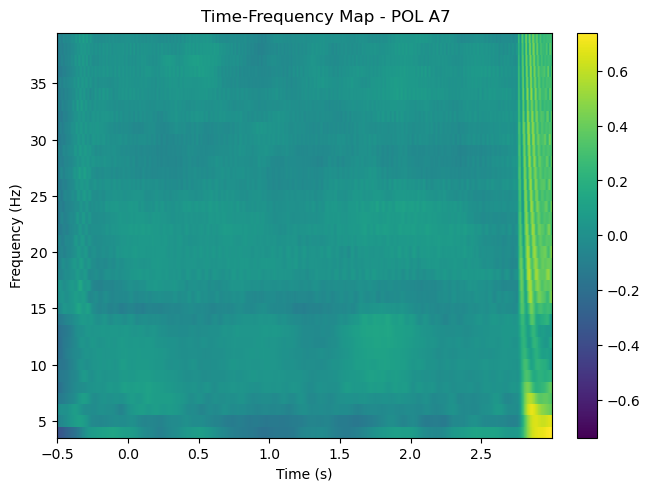

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


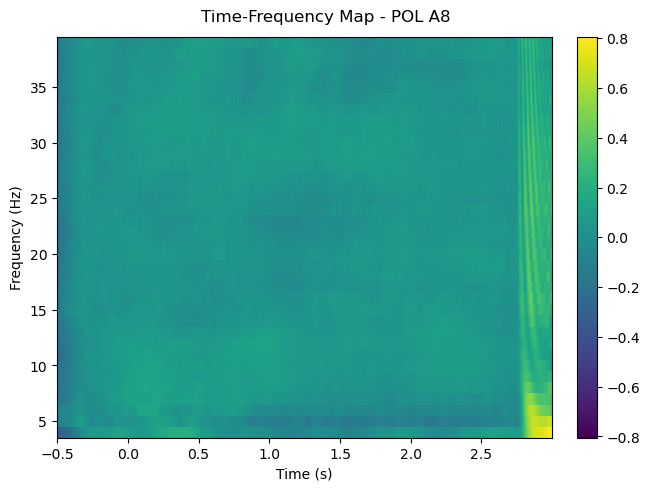

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


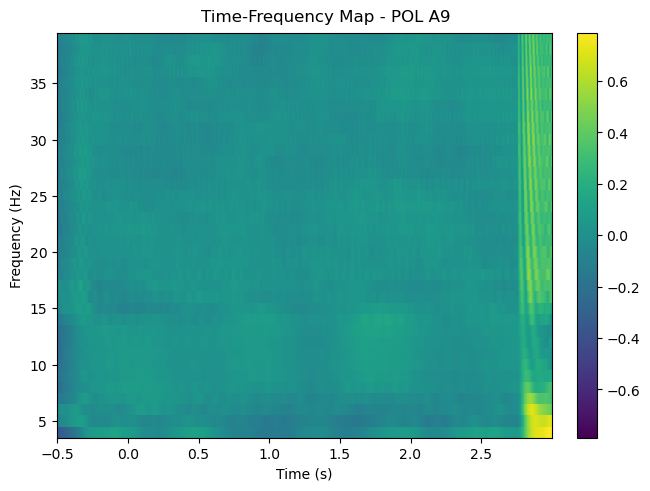

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


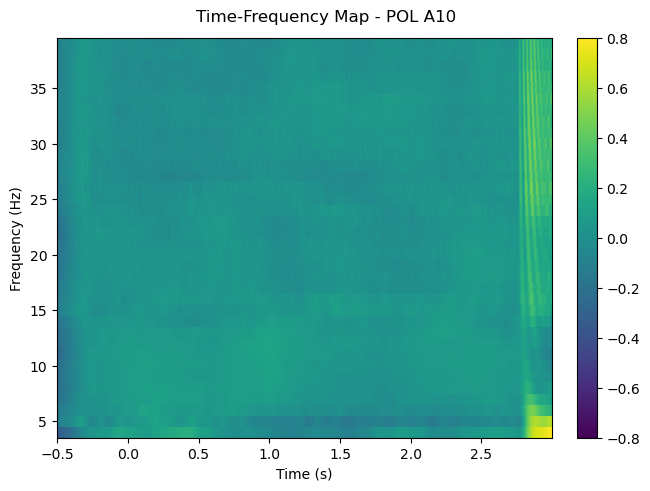

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


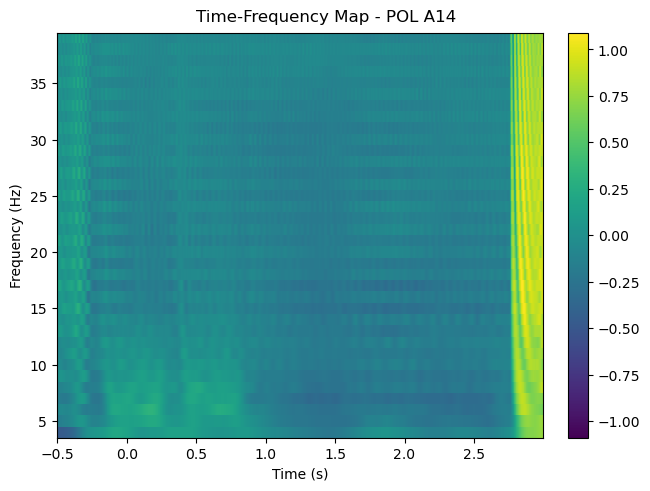

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


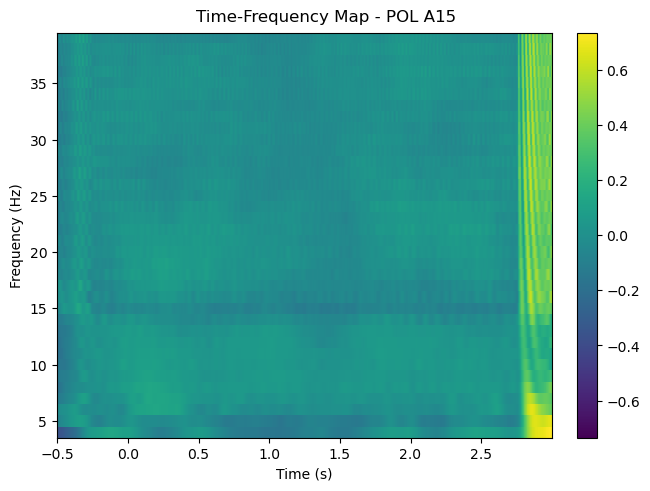

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


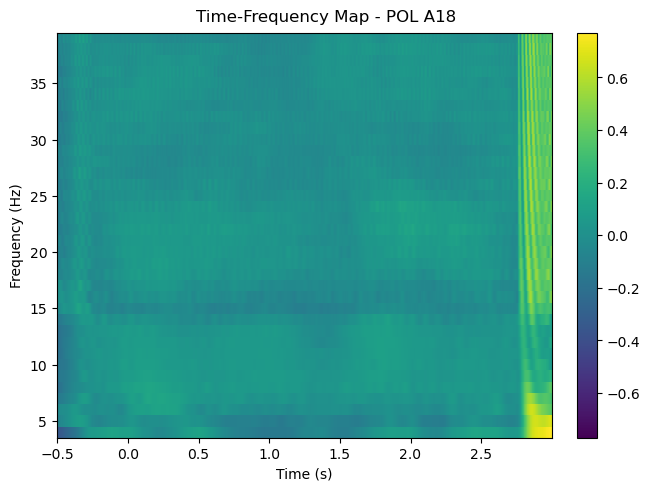

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


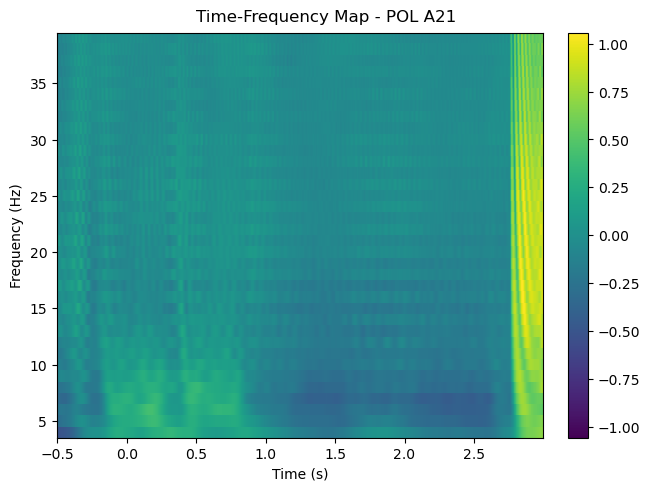

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


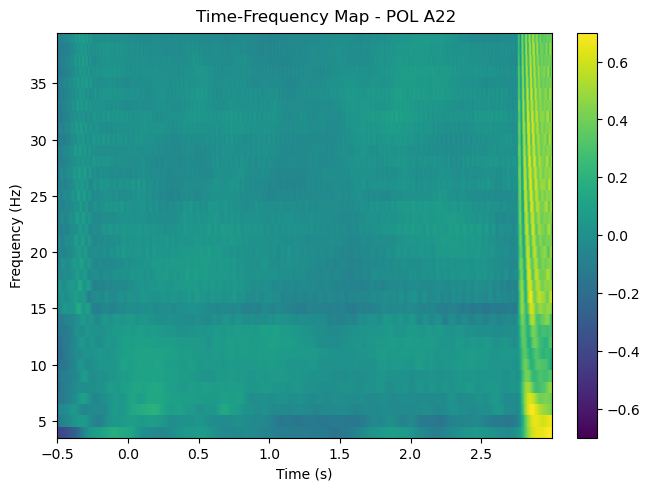

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


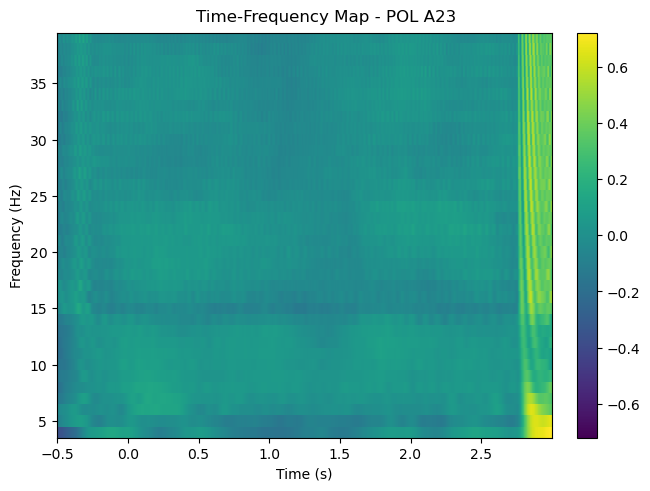

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


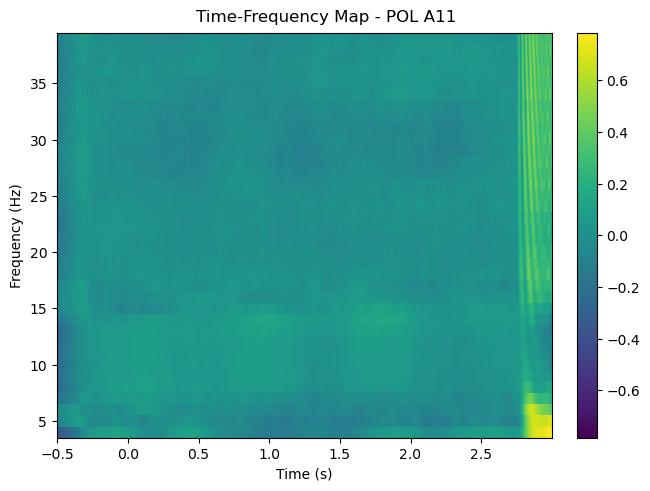

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


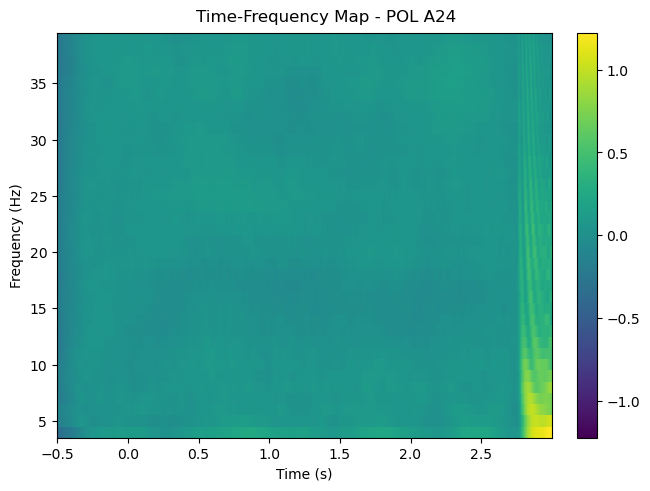

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


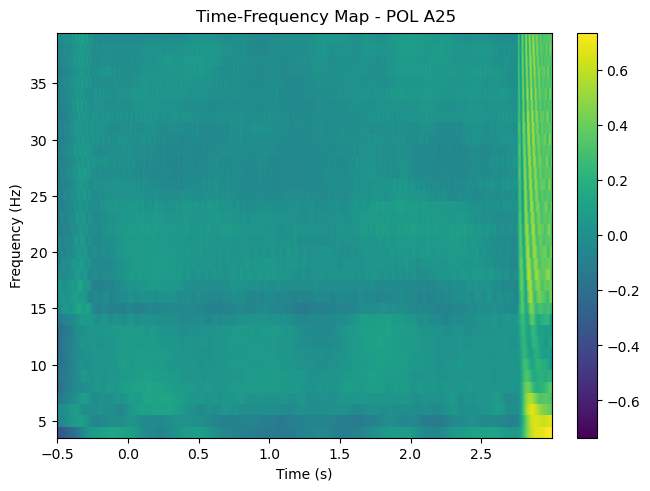

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


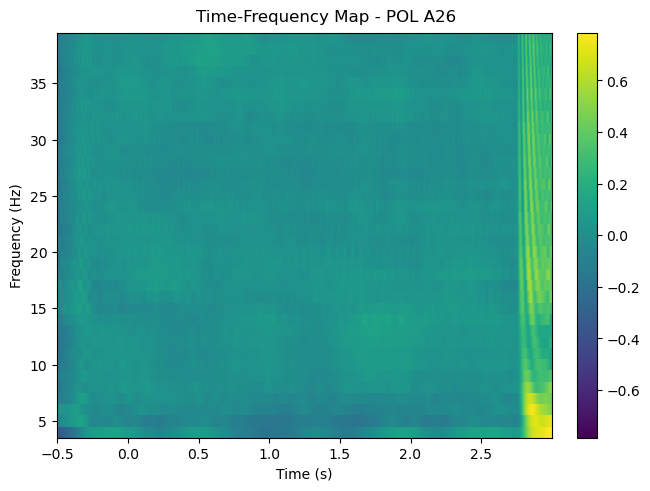

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


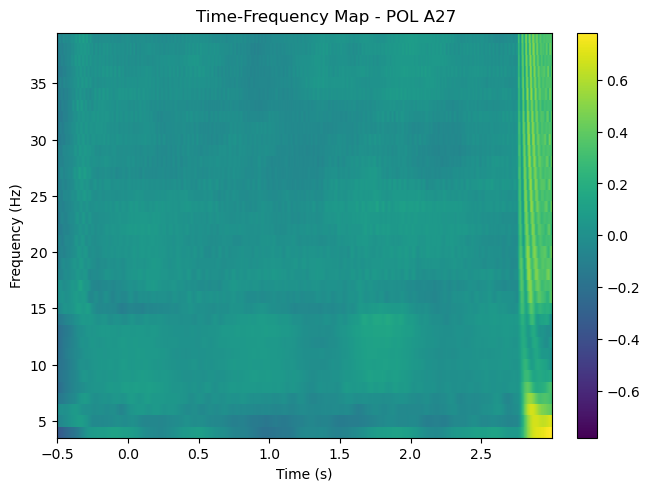

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


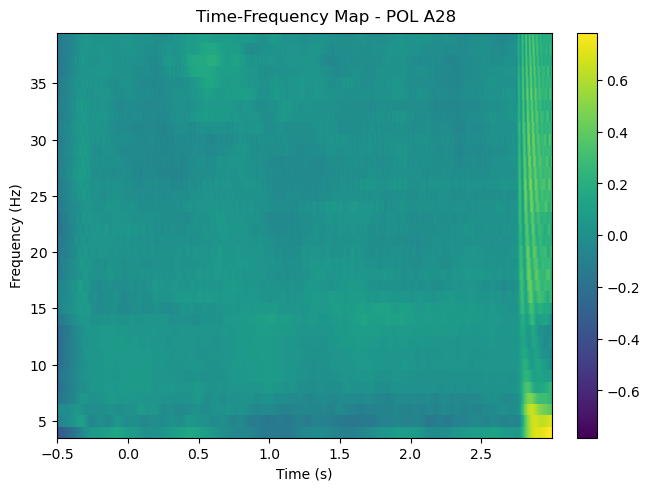

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


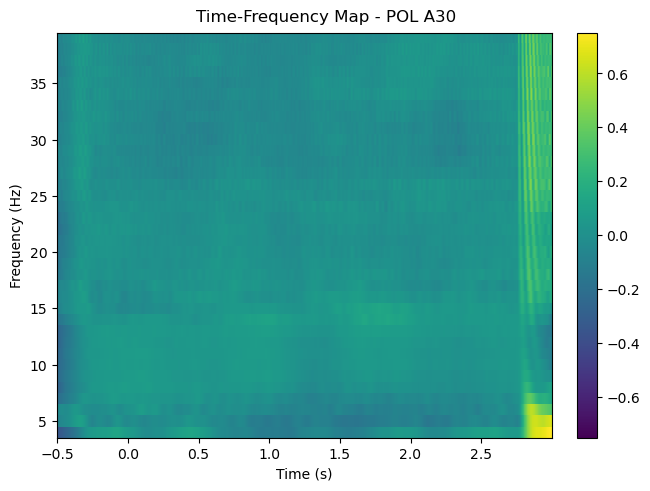

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


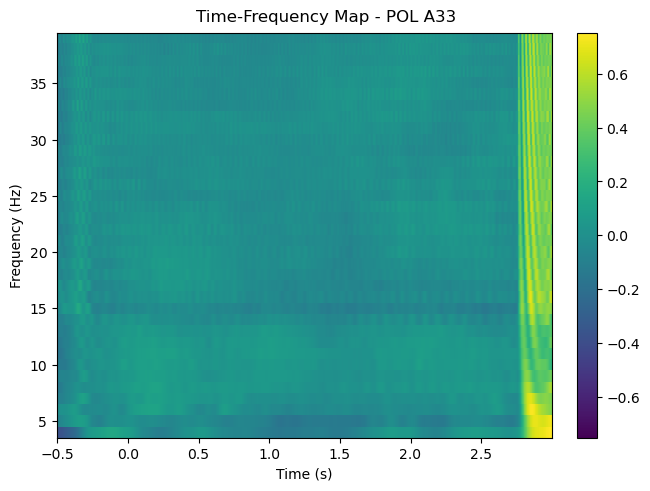

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


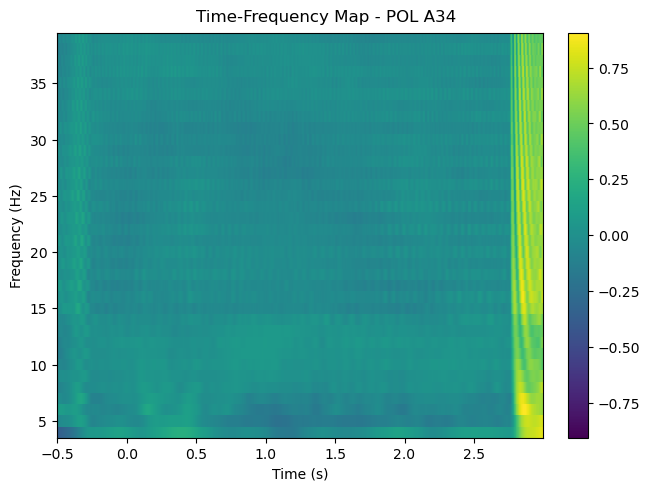

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


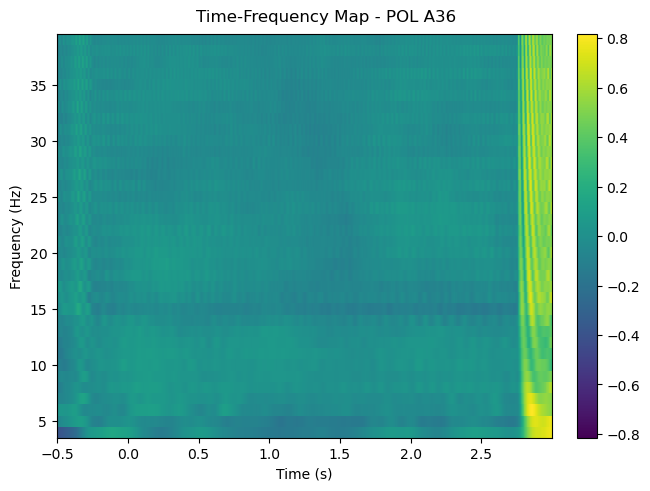

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


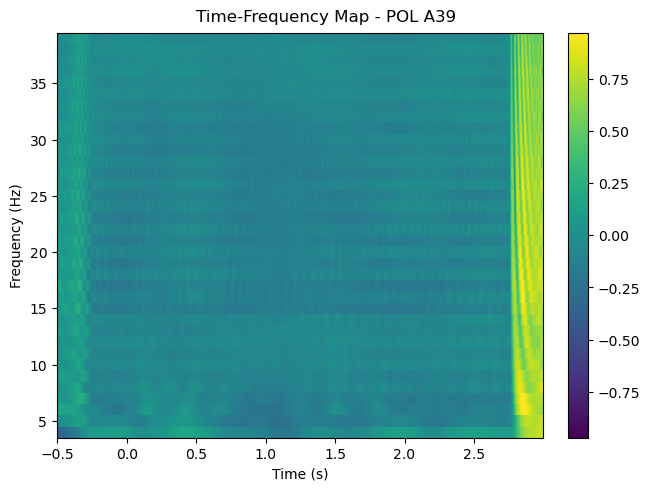

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


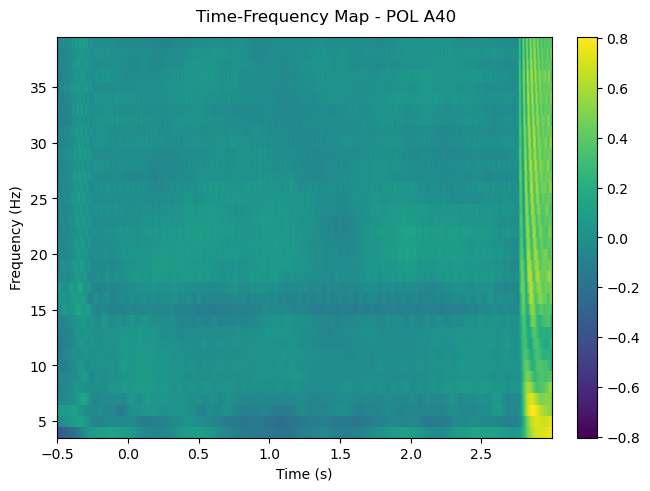

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


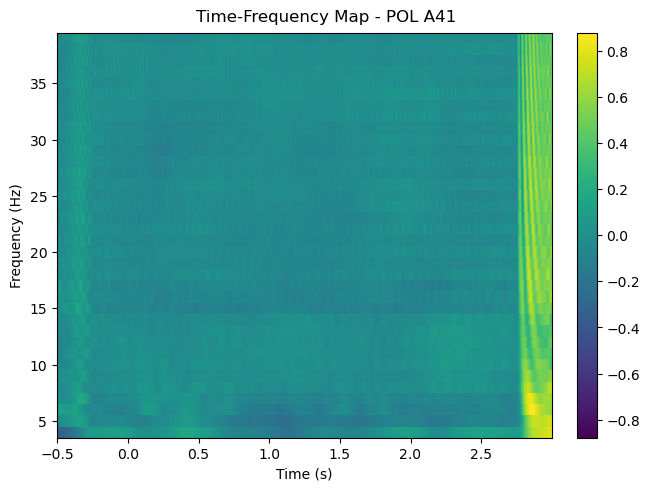

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


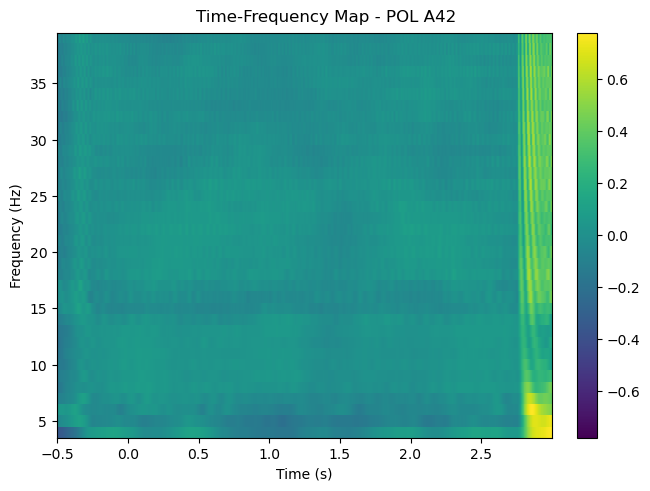

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


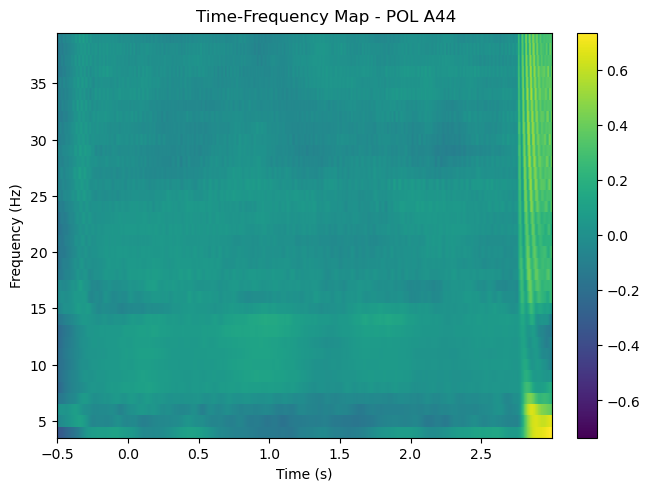

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


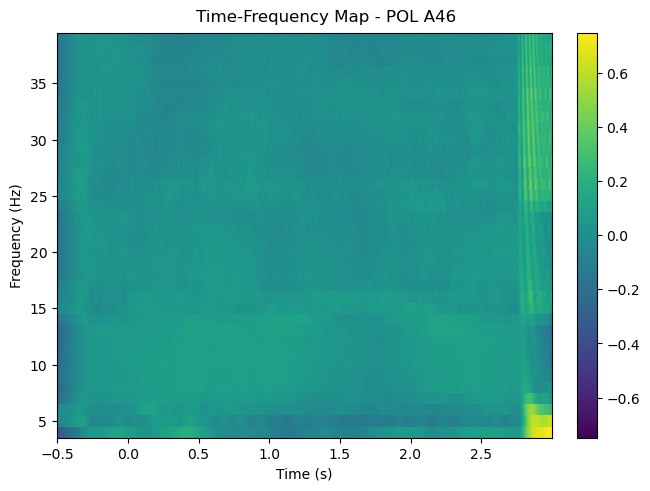

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


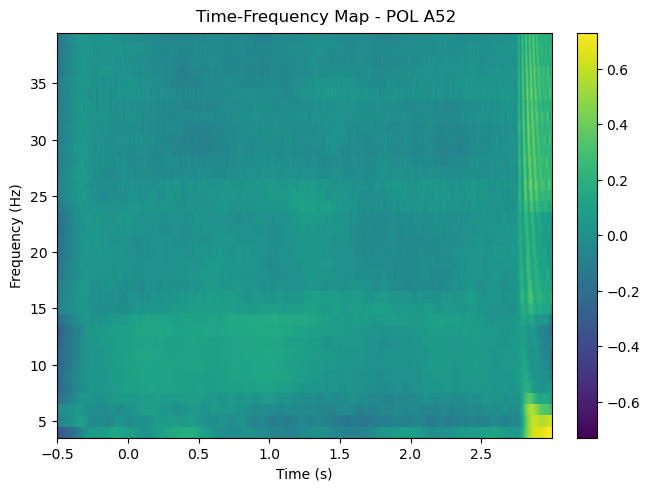

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


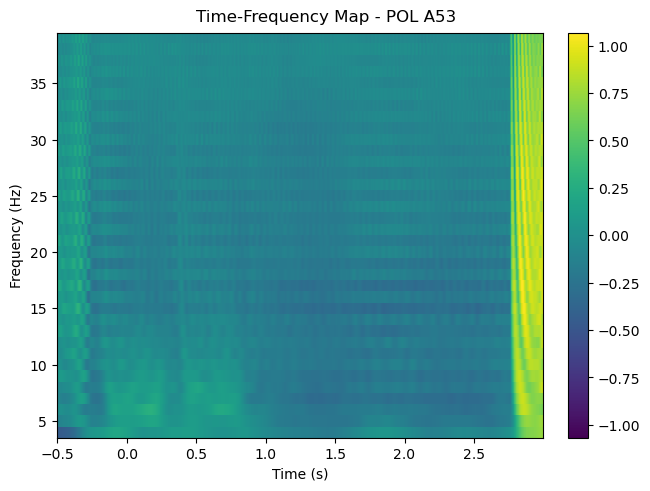

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


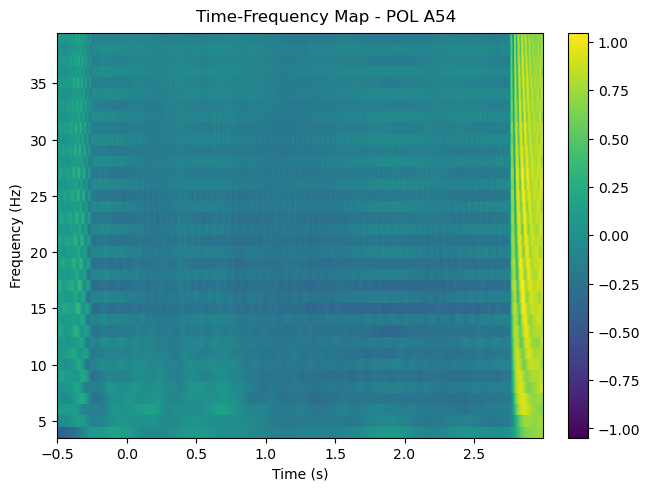

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


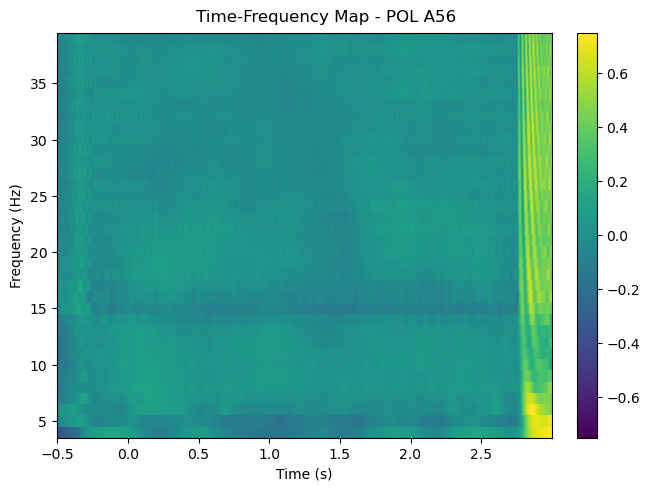

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


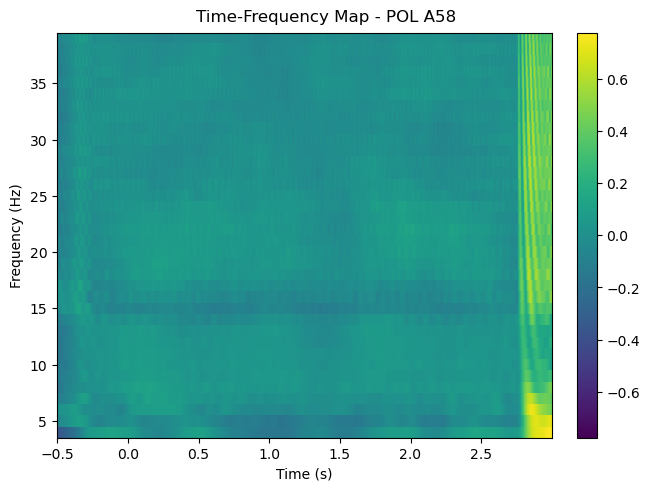

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


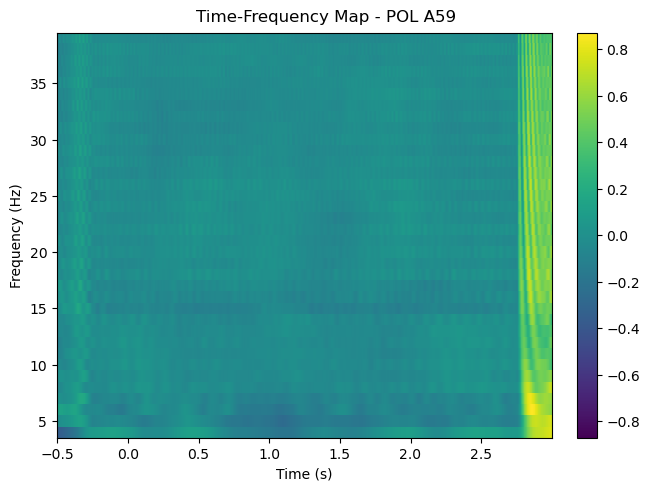

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


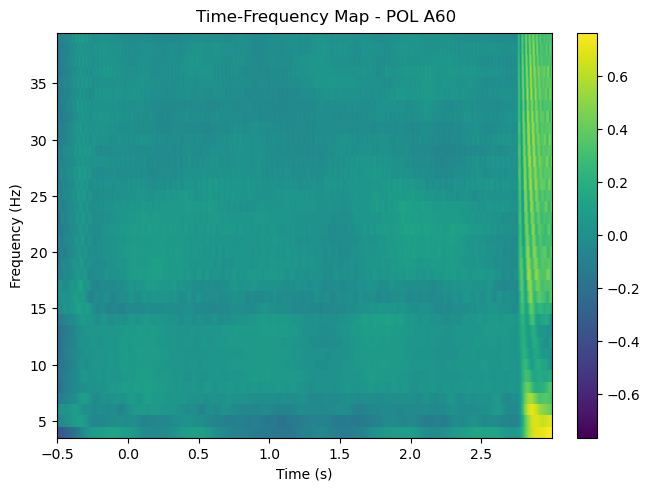

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


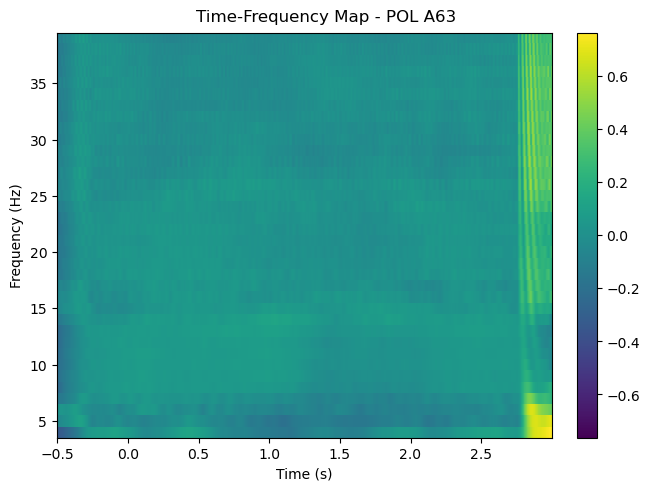

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


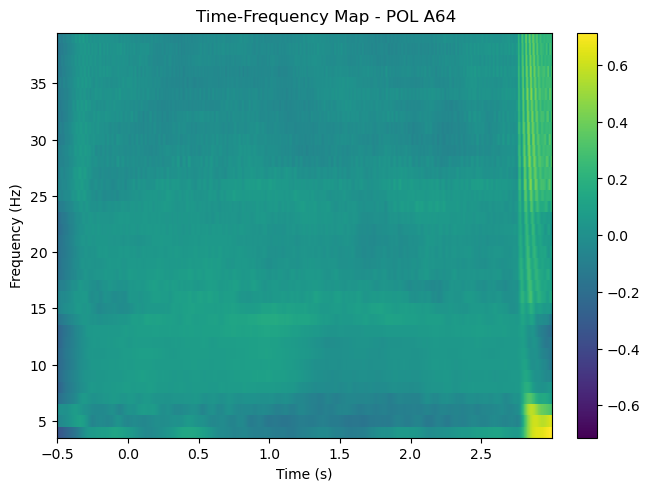

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
Applying baseline correction (mode: logratio)


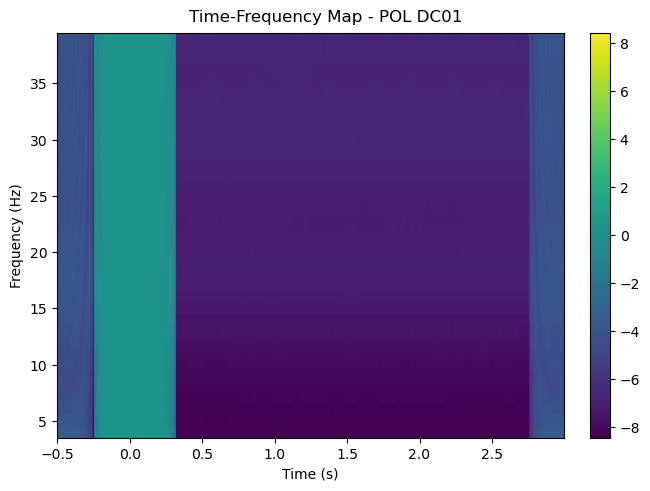

In [19]:
# 设置频率范围和时间窗
freqs = np.arange(4, 40, 1)  # 分析 4Hz 到 40Hz 的频率
n_cycles = freqs / 2         # 时间窗长度，频率越高，时间窗越短

# 对每个通道计算 Time-Frequency Map
for ch in epochs.info['ch_names']:
    power = mne.time_frequency.tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
                                              picks=[ch], use_fft=True, return_itc=False,
                                              decim=3, n_jobs=1)
    
    # 绘制 Time-Frequency Map
    power.plot([0], baseline=(None, 0), mode='logratio',
               title=f"Time-Frequency Map - {ch}", cmap='viridis')

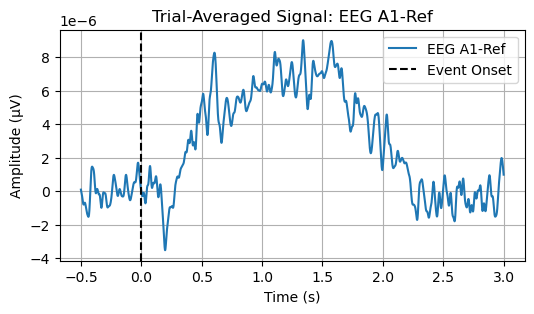

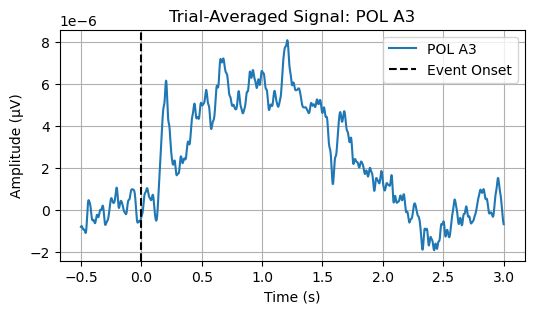

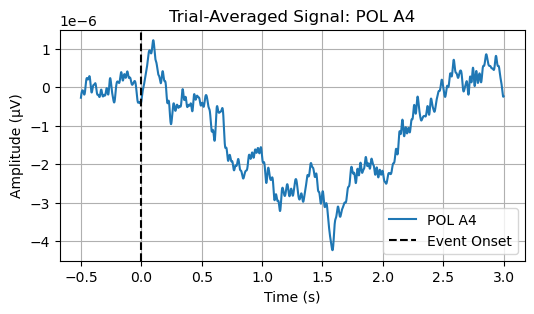

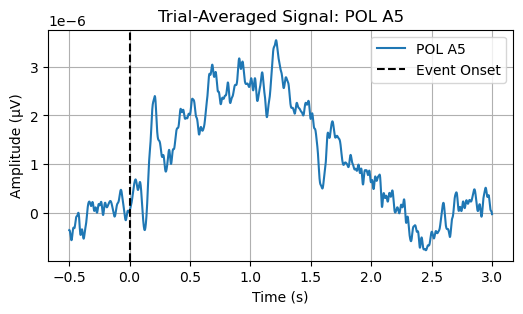

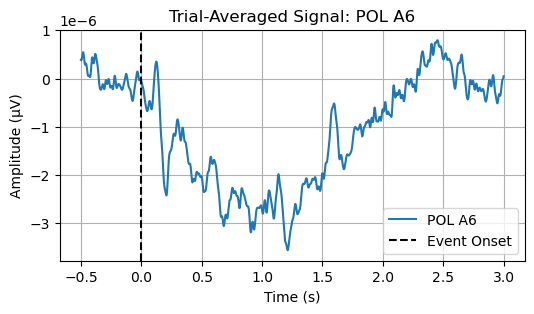

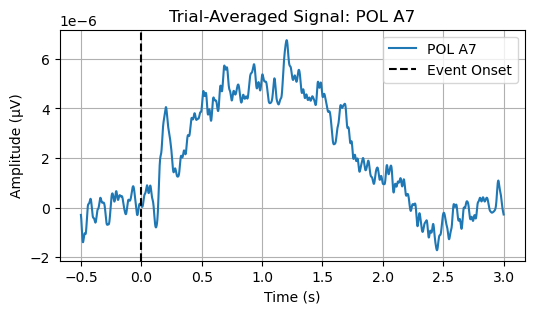

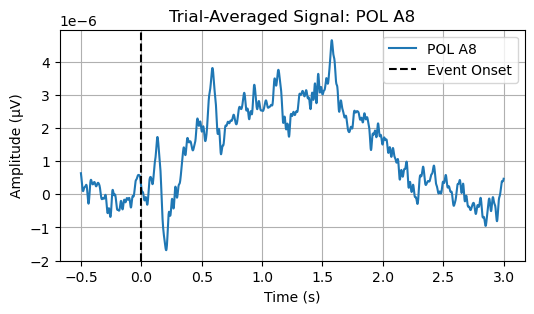

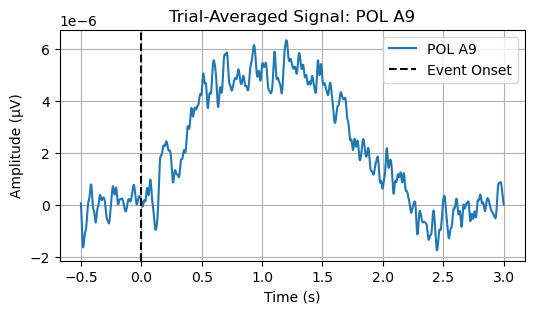

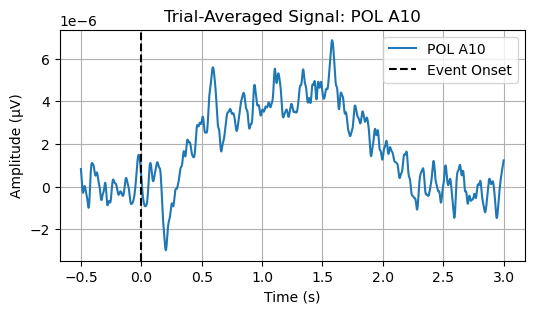

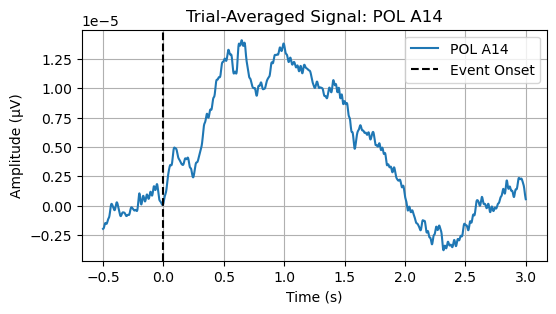

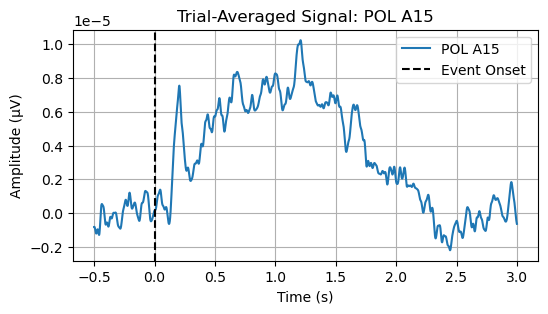

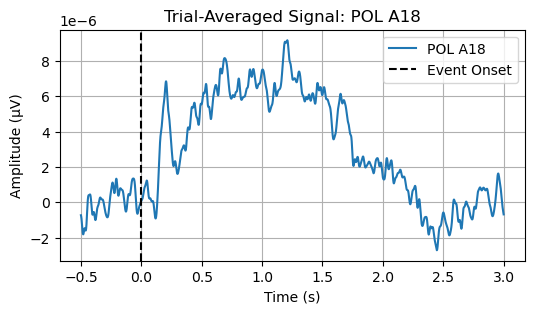

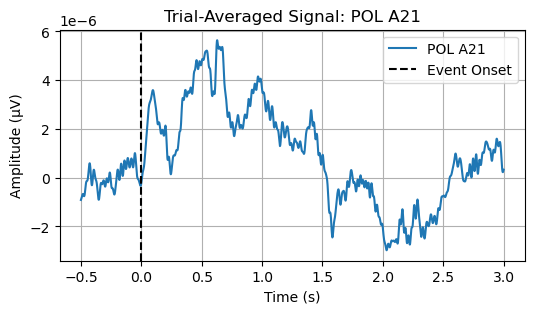

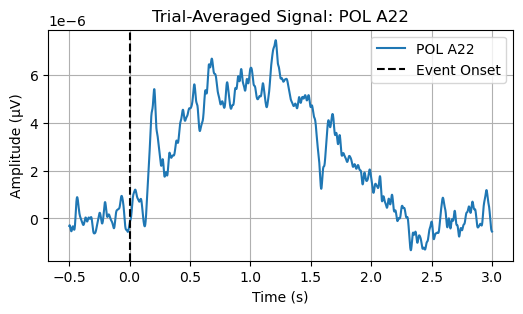

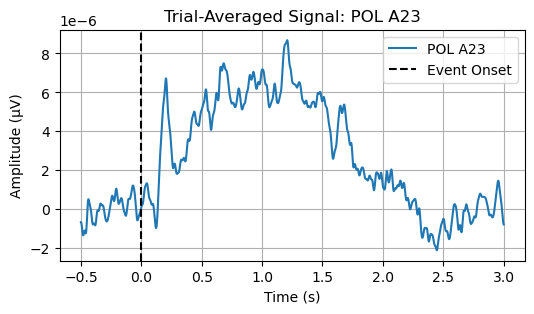

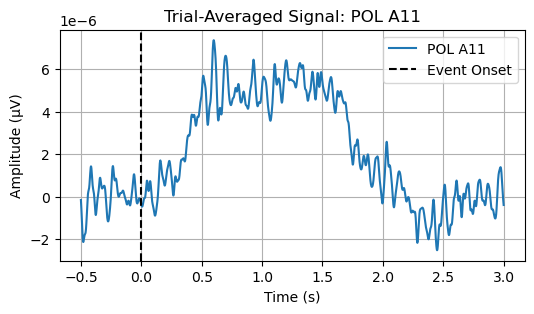

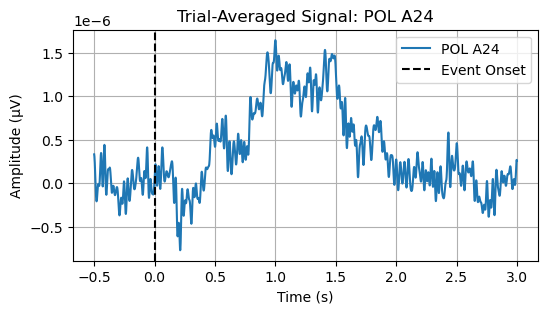

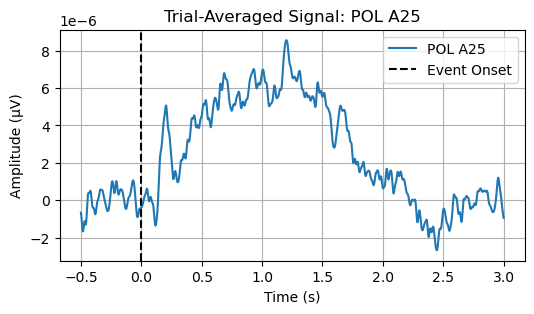

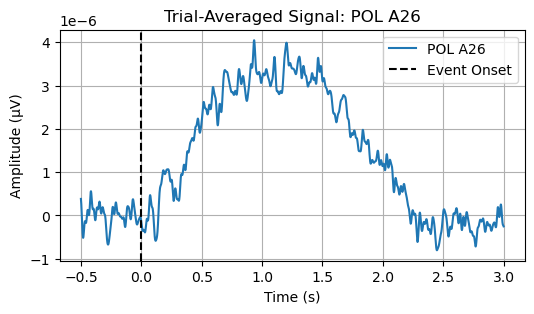

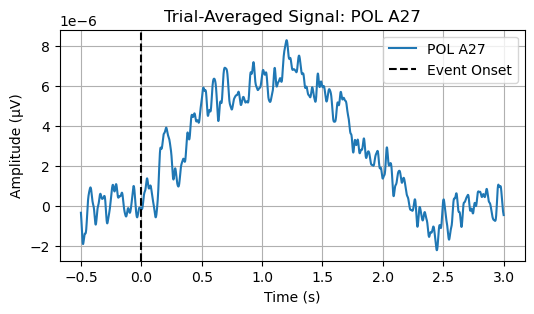

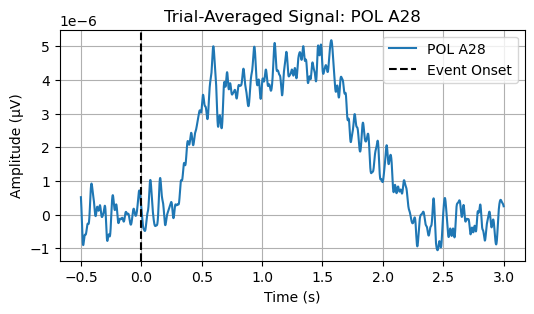

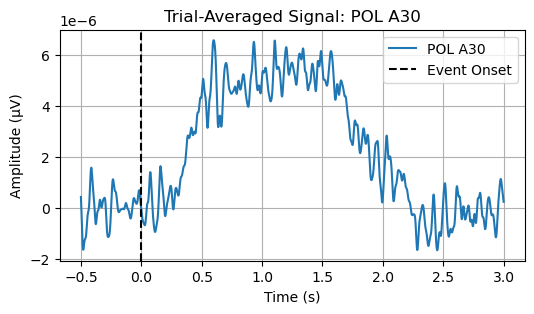

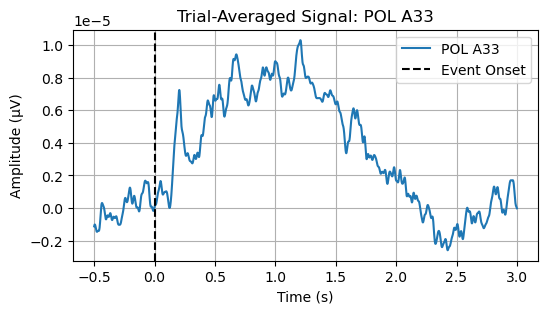

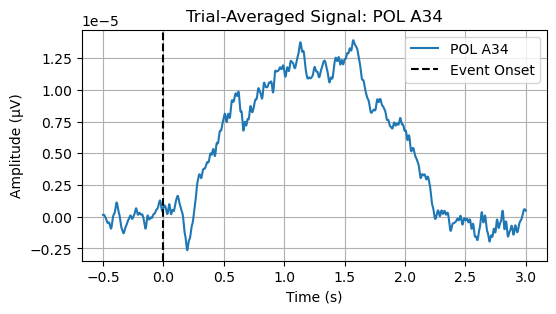

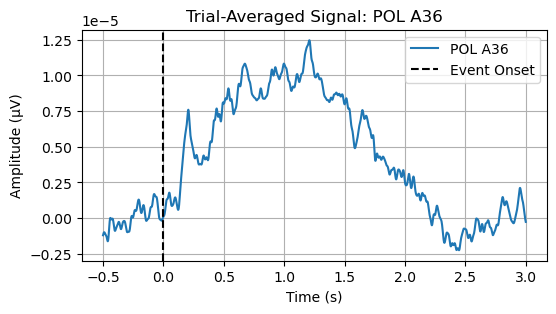

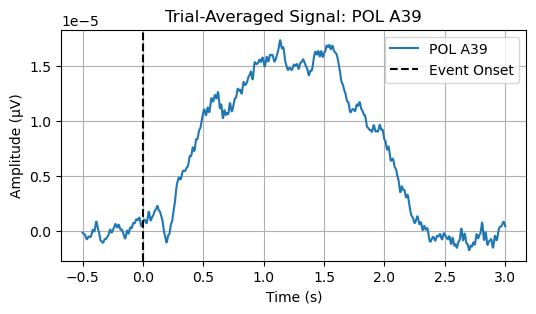

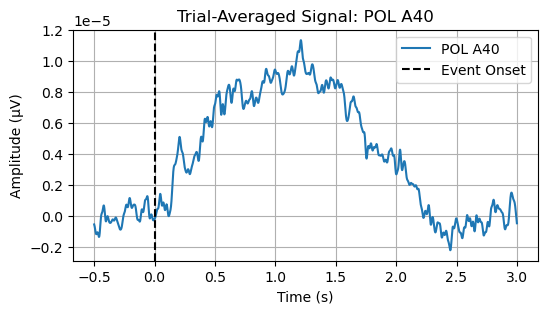

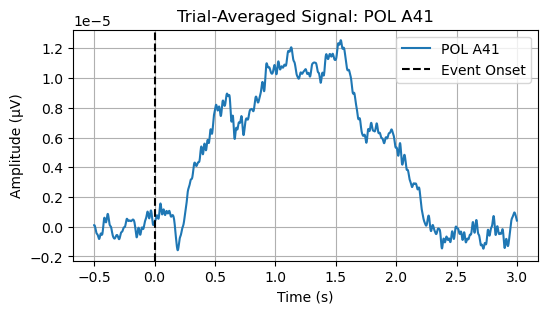

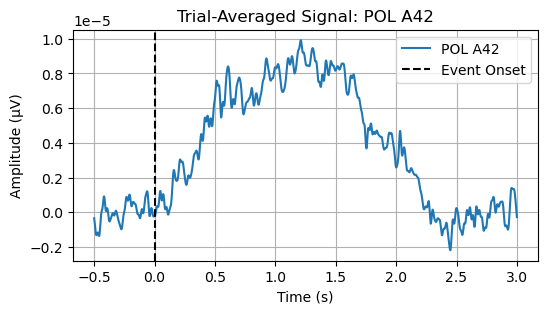

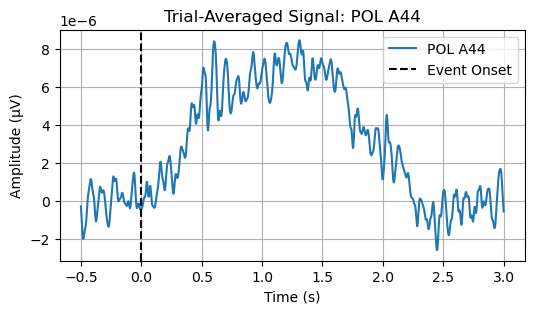

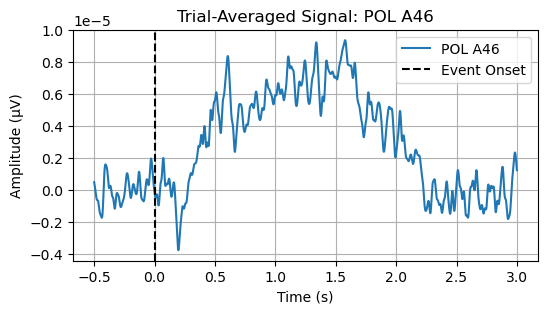

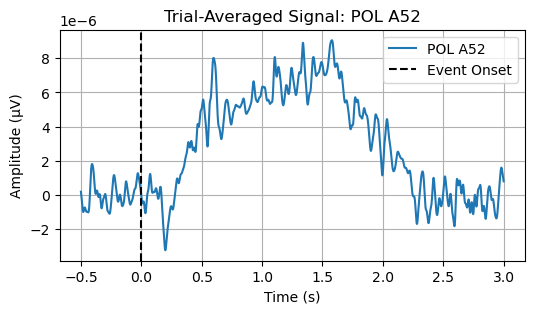

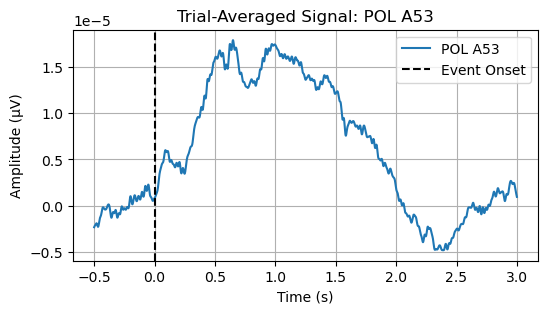

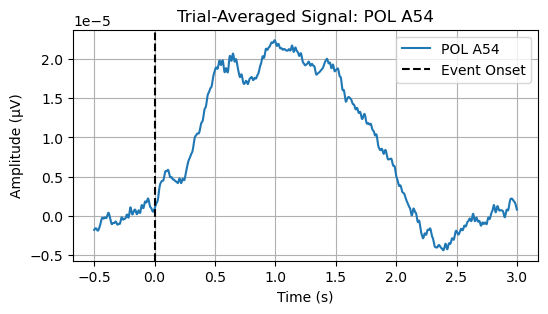

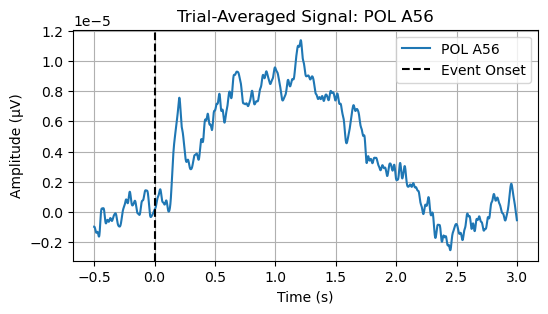

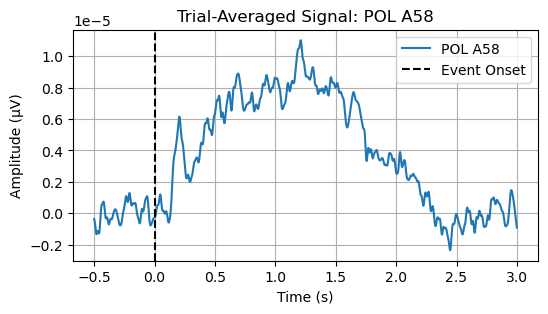

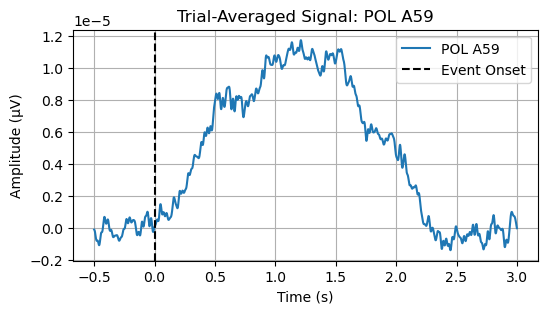

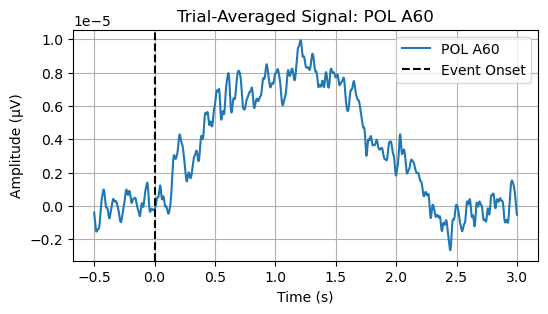

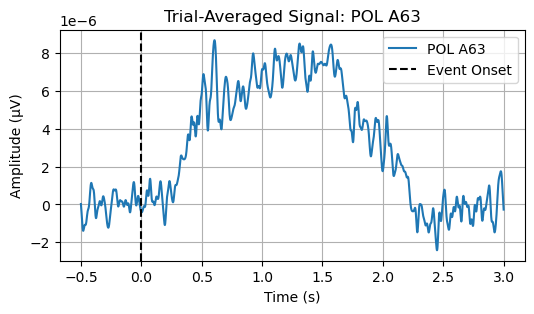

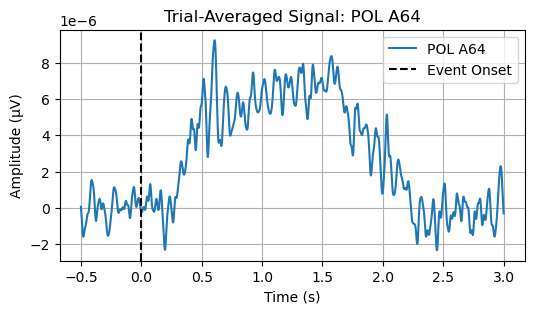

In [20]:
# 计算平均信号 (ERP)
evoked = epochs.average()
# 获取所有通道的名称
channel_names = evoked.info['ch_names']

# 提取平均信号数据
evoked_data = evoked.data  # shape: (n_channels, n_times)
times = evoked.times       # 时间轴

# 绘制每个通道的 Trial-Averaged 信号
for idx, ch_name in enumerate(channel_names):
    plt.figure(figsize=(6, 3))
    plt.plot(times, evoked_data[idx], label=ch_name)
    plt.axvline(0, color='black', linestyle='--', label='Event Onset')  # 事件时间点 (0s)
    plt.title(f"Trial-Averaged Signal: {ch_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (µV)")
    plt.legend()
    plt.grid()
    plt.show()

In [81]:
# 确保 Trigger 数量和 Order 文件行数一致
assert len(filtered_trigger_times) == len(order_data), "Trigger 数量与 Order 文件行数不一致！"
# 提取下划线后的关键信息
order_data['CoreCategory'] = order_data['condition'].apply(lambda x: x.split('_')[-1])
print(order_data[['condition', 'CoreCategory']].head())  # 检查提取结果

# 在 order_data 里创建一个新的字符串列 PositionStr
order_data['PositionStr'] = order_data['position'].astype(str)

# 确保转换成功
print(order_data[['position', 'PositionStr']].head(10))

           condition CoreCategory
0  short_grammatical  grammatical
1  short_grammatical  grammatical
2  short_grammatical  grammatical
3  short_grammatical  grammatical
4  short_grammatical  grammatical
   position PositionStr
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
5         0           0
6        -2          -2
7        -1          -1
8        -1          -1
9        -2          -2


In [79]:
# 创建 Events 列表
events = []
event_id_category = {'grammatical': 1, 'concatenation': 2, 'replacement': 3}  # 类别事件编号
# event_id_position = {0: 10, -1: 11, -2: 12, -3: 13}  # 位置事件编号
event_id_position = {'0': 10, '-1': 11, '-2': 12}  # 位置事件编号

for i, trigger_time in enumerate(filtered_trigger_times):
    category = order_data.loc[i, 'CoreCategory']
    position_str = order_data.loc[i, 'PositionStr']

    # 添加基于类别的事件
    events.append([int(trigger_time * raw.info['sfreq']), 0, event_id_category[category]])

    # 添加基于位置的事件
    events.append([int(trigger_time * raw.info['sfreq']), 0, event_id_position[position_str]])

events = np.array(events)

# 3️⃣ 创建 Epochs
tmin, tmax = -0.5, 3.0  # 设置 Epoch 时间窗口
baseline = (None, 0)  # 基线校正

# 按类别创建 Epochs
epochs_by_category = mne.Epochs(raw, events, event_id=event_id_category,
                                tmin=tmin, tmax=tmax, baseline=baseline, preload=True)

# 按位置创建 Epochs
epochs_by_position = mne.Epochs(raw, events, event_id=event_id_position,
                                tmin=tmin, tmax=tmax, baseline=baseline, preload=True)

print("Event ID in epochs_by_position:", epochs_by_position.event_id)

Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 3501 original time points ...
0 bad epochs dropped
Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 3501 original time points ...
0 bad epochs dropped
Event ID in epochs_by_position: {'0': 10, '-1': 11, '-2': 12}


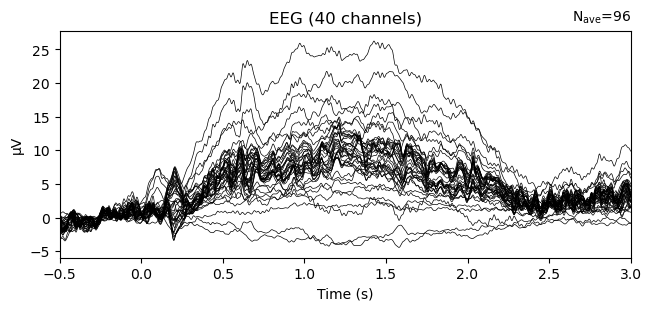

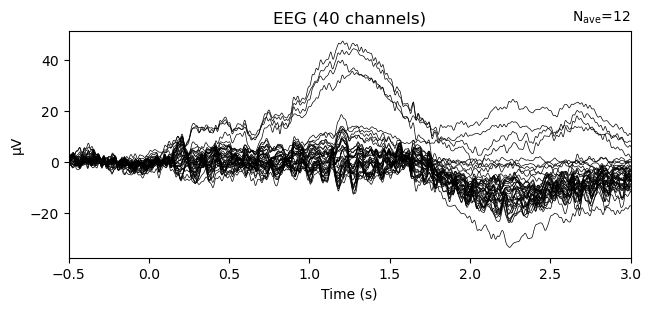

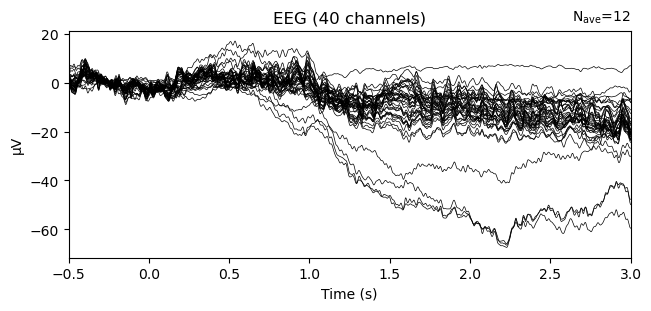

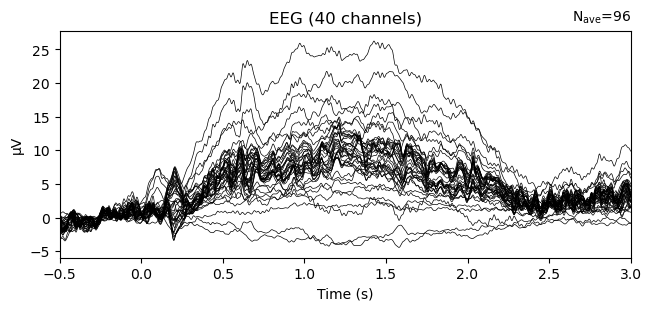

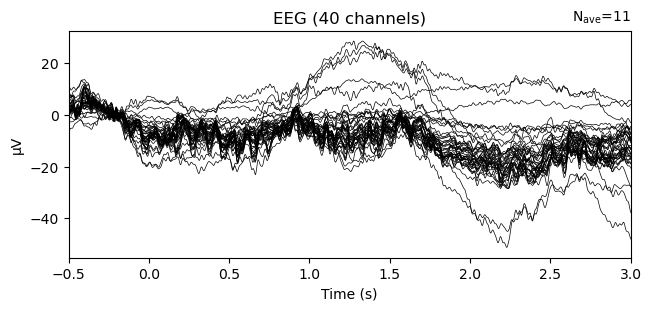

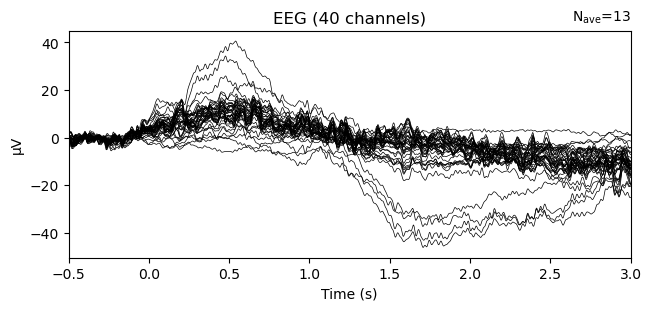

In [89]:
# 4️⃣ 绘制 Trial-Averaged 信号
# 按类别绘制 Trial-Averaged 信号
for category, event_id in event_id_category.items():
    evoked = epochs_by_category[category].average()  # 使用字符串键访问
    fig = evoked.plot()
    fig.suptitle(f"Trial-Averaged Signal (Category: {category})", fontsize=14)  # 添加标题

# 按位置绘制 Trial-Averaged 信号
for position, event_id in event_id_position.items():
    evoked = epochs_by_position[position].average()  # 使用字符串键访问
    fig = evoked.plot()
    fig.suptitle(f"Trial-Averaged Signal (Position: {position})", fontsize=14)  # 添加标题


In [93]:
for position, event_id in event_id_position.items():
    print(f"Position {position}: {len(epochs_by_position[position])} samples")
for category, event_id in event_id_category.items():
    print(f"Position {category}: {len(epochs_by_category[category])} samples")

Position 0: 96 samples
Position -1: 11 samples
Position -2: 13 samples
Position grammatical: 96 samples
Position concatenation: 12 samples
Position replacement: 12 samples


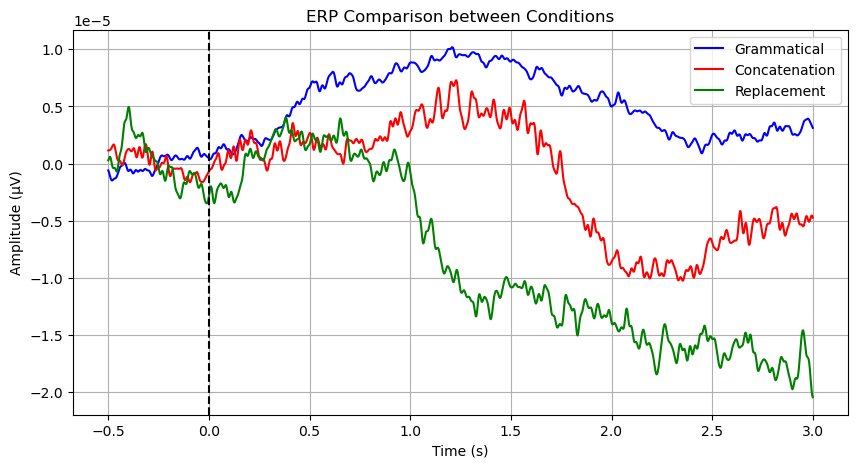

In [95]:
# 1️⃣ 计算不同 Category 条件下的 ERP
evoked_grammatical = epochs_by_category['grammatical'].average()
evoked_concatenation = epochs_by_category['concatenation'].average()
evoked_replacement = epochs_by_category['replacement'].average()

# 2️⃣ 绘制 ERP 比较曲线
plt.figure(figsize=(10, 5))
plt.plot(evoked_grammatical.times, evoked_grammatical.data.mean(axis=0), label='Grammatical', color='b')
plt.plot(evoked_concatenation.times, evoked_concatenation.data.mean(axis=0), label='Concatenation', color='r')
plt.plot(evoked_replacement.times, evoked_replacement.data.mean(axis=0), label='Replacement', color='g')
plt.axvline(0, color='black', linestyle='--')  # 事件时间点
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("ERP Comparison between Conditions")
plt.legend()
plt.grid()
plt.show()


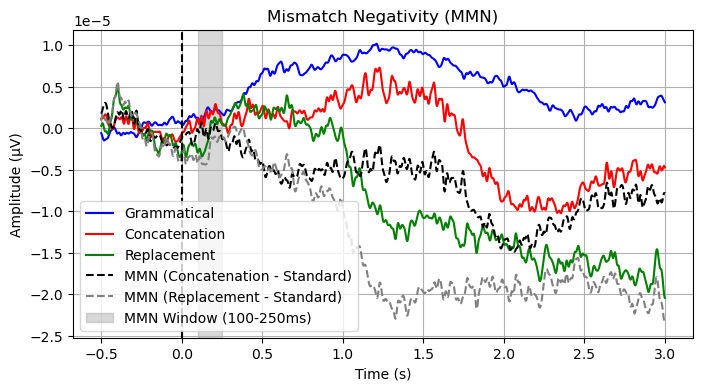

In [103]:
# 2️⃣ 计算 MMN（差异波）
mmn_conc = evoked_concatenation.data - evoked_grammatical.data # 差值计算
mmn_repl = evoked_replacement.data - evoked_grammatical.data  # 差值计算

# 3️⃣ 绘制 MMN
plt.figure(figsize=(8, 4))
plt.plot(evoked_grammatical.times, evoked_grammatical.data.mean(axis=0), label='Grammatical', color='blue')
plt.plot(evoked_concatenation.times, evoked_concatenation.data.mean(axis=0), label='Concatenation', color='red')
plt.plot(evoked_replacement.times, evoked_replacement.data.mean(axis=0), label='Replacement', color='g')
plt.plot(evoked_grammatical.times, mmn_conc.mean(axis=0), label='MMN (Concatenation - Standard)', color='black', linestyle='--')
plt.plot(evoked_grammatical.times, mmn_repl.mean(axis=0), label='MMN (Replacement - Standard)', color='grey', linestyle='--')

plt.axvline(0, color='black', linestyle='--')  # 事件起始时间
plt.axvspan(0.1, 0.25, color='gray', alpha=0.3, label='MMN Window (100-250ms)')  # 典型 MMN 时间窗
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("Mismatch Negativity (MMN)")
plt.legend()
plt.grid()
plt.show()


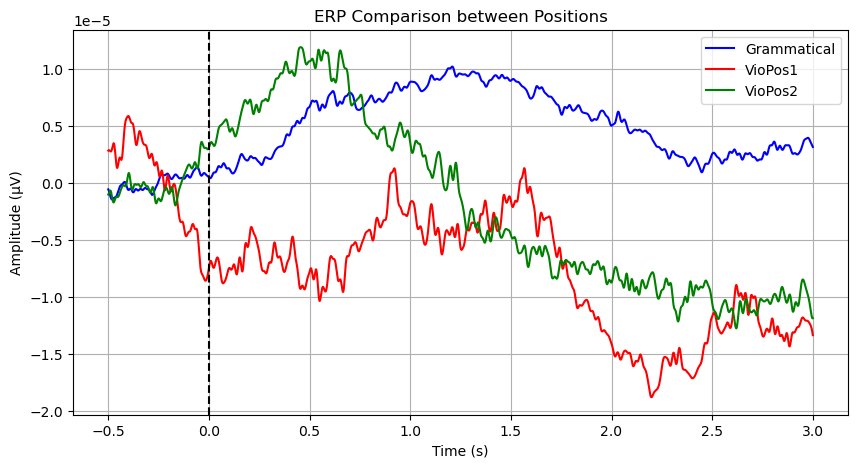

In [105]:
# 1️⃣ 计算不同 Position 条件下的 ERP
evoked_standard = epochs_by_position['0'].average()
evoked_last1 = epochs_by_position['-1'].average()
evoked_last2 = epochs_by_position['-2'].average()

# 2️⃣ 绘制 ERP 比较曲线
plt.figure(figsize=(10, 5))
plt.plot(evoked_standard.times, evoked_standard.data.mean(axis=0), label='Grammatical', color='b')
plt.plot(evoked_last1.times, evoked_last1.data.mean(axis=0), label='VioPos1', color='r')
plt.plot(evoked_last2.times, evoked_last2.data.mean(axis=0), label='VioPos2', color='g')
plt.axvline(0, color='black', linestyle='--')  # 事件时间点
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title("ERP Comparison between Positions")
plt.legend()
plt.grid()
plt.show()
